# Problem Statement

## Introduction
Basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
Consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.**"Two types of risks"** are associated with the bank’s decision:

>If the applicant is likely to **"repay the loan"**, then not approving the loan results in a **"loss of business to the company"**.

>If the applicant is **"not likely to repay the loan"**, i.e. he/she is likely to default, then approving the loan may lead to a **"financial loss for the company"**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

## Data 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [2]:
data=pd.read_csv("loan/loan.csv")

C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\1188443117.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("loan/loan.csv")


### Data Description 
**"	acc_now_delinq	"**	:		The number of accounts on which the borrower is now delinquent.	<br>
**"	acc_open_past_24mths	"**	:		Number of trades opened in past 24 months.	<br>
**"	addr_state	"**	:		The state provided by the borrower in the loan application	<br>
**"	all_util	"**	:		Balance to credit limit on all trades	<br>
**"	annual_inc	"**	:		The self-reported annual income provided by the borrower during registration.	<br>
**"	annual_inc_joint	"**	:		The combined self-reported annual income provided by the co-borrowers during registration	<br>
**"	application_type	"**	:		Indicates whether the loan is an individual application or a joint application with two co-borrowers	<br>
**"	avg_cur_bal	"**	:		Average current balance of all accounts	<br>
**"	bc_open_to_buy	"**	:		Total open to buy on revolving bankcards.	<br>
**"	bc_util	"**	:		Ratio of total current balance to high credit/credit limit for all bankcard accounts.	<br>
**"	chargeoff_within_12_mths	"**	:		Number of charge-offs within 12 months	<br>
**"	collection_recovery_fee	"**	:		post charge off collection fee	<br>
**"	collections_12_mths_ex_med	"**	:		Number of collections in 12 months excluding medical collections	<br>
**"	delinq_2yrs	"**	:		The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years	<br>
**"	delinq_amnt	"**	:		The past-due amount owed for the accounts on which the borrower is now delinquent.	<br>
**"	desc	"**	:		Loan description provided by the borrower	<br>
**"	dti	"**	:		A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.	<br>
**"	dti_joint	"**	:		A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income	<br>
**"	earliest_cr_line	"**	:		The month the borrower's earliest reported credit line was opened	<br>
**"	emp_length	"**	:		Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 	<br>
**"	emp_title	"**	:		The job title supplied by the Borrower when applying for the loan.*	<br>
**"	fico_range_high	"**	:		The upper boundary range the borrower’s FICO at loan origination belongs to.	<br>
**"	fico_range_low	"**	:		The lower boundary range the borrower’s FICO at loan origination belongs to.	<br>
**"	funded_amnt	"**	:		The total amount committed to that loan at that point in time.	<br>
**"	funded_amnt_inv	"**	:		The total amount committed by investors for that loan at that point in time.	<br>
**"	grade	"**	:		LC assigned loan grade	<br>
**"	home_ownership	"**	:		The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.	<br>
**"	id	"**	:		A unique LC assigned ID for the loan listing.	<br>
**"	il_util	"**	:		Ratio of total current balance to high credit/credit limit on all install acct	<br>
**"	initial_list_status	"**	:		The initial listing status of the loan. Possible values are – W, F	<br>
**"	inq_fi	"**	:		Number of personal finance inquiries	<br>
**"	inq_last_12m	"**	:		Number of credit inquiries in past 12 months	<br>
**"	inq_last_6mths	"**	:		The number of inquiries in past 6 months (excluding auto and mortgage inquiries)	<br>
**"	installment	"**	:		The monthly payment owed by the borrower if the loan originates.	<br>
**"	int_rate	"**	:		Interest Rate on the loan	<br>
**"	issue_d	"**	:		The month which the loan was funded	<br>
**"	last_credit_pull_d	"**	:		The most recent month LC pulled credit for this loan	<br>
**"	last_fico_range_high	"**	:		The upper boundary range the borrower’s last FICO pulled belongs to.	<br>
**"	last_fico_range_low	"**	:		The lower boundary range the borrower’s last FICO pulled belongs to.	<br>
**"	last_pymnt_amnt	"**	:		Last total payment amount received	<br>
**"	last_pymnt_d	"**	:		Last month payment was received	<br>
**"	loan_amnt	"**	:		The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.	<br>
**"	loan_status	"**	:		Current status of the loan	<br>
**"	max_bal_bc	"**	:		Maximum current balance owed on all revolving accounts	<br>
**"	member_id	"**	:		A unique LC assigned Id for the borrower member.	<br>
**"	mo_sin_old_il_acct	"**	:		Months since oldest bank installment account opened	<br>
**"	mo_sin_old_rev_tl_op	"**	:		Months since oldest revolving account opened	<br>
**"	mo_sin_rcnt_rev_tl_op	"**	:		Months since most recent revolving account opened	<br>
**"	mo_sin_rcnt_tl	"**	:		Months since most recent account opened	<br>
**"	mort_acc	"**	:		Number of mortgage accounts.	<br>
**"	mths_since_last_delinq	"**	:		The number of months since the borrower's last delinquency.	<br>
**"	mths_since_last_major_derog	"**	:		Months since most recent 90-day or worse rating	<br>
**"	mths_since_last_record	"**	:		The number of months since the last public record.	<br>
**"	mths_since_rcnt_il	"**	:		Months since most recent installment accounts opened	<br>
**"	mths_since_recent_bc	"**	:		Months since most recent bankcard account opened.	<br>
**"	mths_since_recent_bc_dlq	"**	:		Months since most recent bankcard delinquency	<br>
**"	mths_since_recent_inq	"**	:		Months since most recent inquiry.	<br>
**"	mths_since_recent_revol_delinq	"**	:		Months since most recent revolving delinquency.	<br>
**"	next_pymnt_d	"**	:		Next scheduled payment date	<br>
**"	num_accts_ever_120_pd	"**	:		Number of accounts ever 120 or more days past due	<br>
**"	num_actv_bc_tl	"**	:		Number of currently active bankcard accounts	<br>
**"	num_actv_rev_tl	"**	:		Number of currently active revolving trades	<br>
**"	num_bc_sats	"**	:		Number of satisfactory bankcard accounts	<br>
**"	num_bc_tl	"**	:		Number of bankcard accounts	<br>
**"	num_il_tl	"**	:		Number of installment accounts	<br>
**"	num_op_rev_tl	"**	:		Number of open revolving accounts	<br>
**"	num_rev_accts	"**	:		Number of revolving accounts	<br>
**"	num_rev_tl_bal_gt_0	"**	:		Number of revolving trades with balance >0	<br>
**"	num_sats	"**	:		Number of satisfactory accounts	<br>
**"	num_tl_120dpd_2m	"**	:		Number of accounts currently 120 days past due (updated in past 2 months)	<br>
**"	num_tl_30dpd	"**	:		Number of accounts currently 30 days past due (updated in past 2 months)	<br>
**"	num_tl_90g_dpd_24m	"**	:		Number of accounts 90 or more days past due in last 24 months	<br>
**"	num_tl_op_past_12m	"**	:		Number of accounts opened in past 12 months	<br>
**"	open_acc	"**	:		The number of open credit lines in the borrower's credit file.	<br>
**"	open_acc_6m	"**	:		Number of open trades in last 6 months	<br>
**"	open_il_12m	"**	:		Number of installment accounts opened in past 12 months	<br>
**"	open_il_24m	"**	:		Number of installment accounts opened in past 24 months	<br>
**"	open_il_6m	"**	:		Number of currently active installment trades	<br>
**"	open_rv_12m	"**	:		Number of revolving trades opened in past 12 months	<br>
**"	open_rv_24m	"**	:		Number of revolving trades opened in past 24 months	<br>
**"	out_prncp	"**	:		Remaining outstanding principal for total amount funded	<br>
**"	out_prncp_inv	"**	:		Remaining outstanding principal for portion of total amount funded by investors	<br>
**"	pct_tl_nvr_dlq	"**	:		Percent of trades never delinquent	<br>
**"	percent_bc_gt_75	"**	:		Percentage of all bankcard accounts > 75% of limit.	<br>
**"	policy_code	"**	:		"publicly available policy_code=1
new products not publicly available policy_code=2"	<br>
**"	pub_rec	"**	:		Number of derogatory public records	<br>
**"	pub_rec_bankruptcies	"**	:		Number of public record bankruptcies	<br>
**"	purpose	"**	:		A category provided by the borrower for the loan request. 	<br>
**"	pymnt_plan	"**	:		Indicates if a payment plan has been put in place for the loan	<br>
**"	recoveries	"**	:		post charge off gross recovery	<br>
**"	revol_bal	"**	:		Total credit revolving balance	<br>
**"	revol_util	"**	:		Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.	<br>
**"	sub_grade	"**	:		LC assigned loan subgrade	<br>
**"	tax_liens	"**	:		Number of tax liens	<br>
**"	term	"**	:		The number of payments on the loan. Values are in months and can be either 36 or 60.	<br>
**"	title	"**	:		The loan title provided by the borrower	<br>
**"	tot_coll_amt	"**	:		Total collection amounts ever owed	<br>
**"	tot_cur_bal	"**	:		Total current balance of all accounts	<br>
**"	tot_hi_cred_lim	"**	:		Total high credit/credit limit	<br>
**"	total_acc	"**	:		The total number of credit lines currently in the borrower's credit file	<br>
**"	total_bal_ex_mort	"**	:		Total credit balance excluding mortgage	<br>
**"	total_bal_il	"**	:		Total current balance of all installment accounts	<br>
**"	total_bc_limit	"**	:		Total bankcard high credit/credit limit	<br>
**"	total_cu_tl	"**	:		Number of finance trades	<br>
**"	total_il_high_credit_limit	"**	:		Total installment high credit/credit limit	<br>
**"	total_pymnt	"**	:		Payments received to date for total amount funded	<br>
**"	total_pymnt_inv	"**	:		Payments received to date for portion of total amount funded by investors	<br>
**"	total_rec_int	"**	:		Interest received to date	<br>
**"	total_rec_late_fee	"**	:		Late fees received to date	<br>
**"	total_rec_prncp	"**	:		Principal received to date	<br>
**"	total_rev_hi_lim  	"**	:		Total revolving high credit/credit limit	<br>
**"	url	"**	:		URL for the LC page with listing data.	<br>
**"	verification_status	"**	:		Indicates if income was verified by LC, not verified, or if the income source was verified	<br>
**"	verified_status_joint	"**	:		Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified	<br>
**"	zip_code	"**	:		The first 3 numbers of the zip code provided by the borrower in the loan application.	<br>

In [ ]:
data

### Loan Data Set
<img src = "img/Loan_image.png">

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate).

    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan.
    
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset).

#### Data infomation

In [3]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [4]:
# Missing values
missing_values = data.isnull().sum()/len(data)
missing_values

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.061913
emp_length                        0.027066
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
issue_d                           0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
url                               0.000000
desc                              0.325805
purpose                           0.000000
title                             0.000277
zip_code                          0.000000
addr_state 

In [5]:
# Removing the columns if data is missing more than 50%
Columns_remove=[i for i in data.columns if data[i].isnull().sum()/len(data)>0.10]

In [6]:
# Total no of columns to removed from data  frame
len(Columns_remove)

58

In [7]:
New_data=data.drop(Columns_remove,axis=1)

#### Fixing missing values 
we remove 58 columns from 111 columns <br>
In 58 columns data is missing is >10%

In [8]:
New_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.

In [9]:
missing_values = New_data.isnull().sum()/len(data)
missing_values

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [10]:
Columns_having_null=[i for i in New_data.columns if New_data[i].isnull().sum()>0]

In [11]:
New_data[Columns_having_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   emp_title                   37258 non-null  object 
 1   emp_length                  38642 non-null  object 
 2   title                       39706 non-null  object 
 3   revol_util                  39667 non-null  object 
 4   last_pymnt_d                39646 non-null  object 
 5   last_credit_pull_d          39715 non-null  object 
 6   collections_12_mths_ex_med  39661 non-null  float64
 7   chargeoff_within_12_mths    39661 non-null  float64
 8   pub_rec_bankruptcies        39020 non-null  float64
 9   tax_liens                   39678 non-null  float64
dtypes: float64(4), object(6)
memory usage: 3.0+ MB


In [13]:
New_data[Columns_having_null].nunique()

emp_title                     28820
emp_length                       11
title                         19615
revol_util                     1089
last_pymnt_d                    101
last_credit_pull_d              106
collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

In [14]:
# Droping employee title column 
New_data=New_data.drop("emp_title",axis=1)

In [15]:
New_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
New_data["emp_length"]=New_data["emp_length"].str.replace("years","")
New_data["emp_length"]=New_data["emp_length"].str.replace("+","")
New_data["emp_length"]=New_data["emp_length"].str.replace("< 1 year","0")
New_data["emp_length"]=New_data["emp_length"].str.replace("1 year","1")
New_data["emp_length"]=New_data["emp_length"].str.replace(" ","")

C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\2164389676.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  New_data["emp_length"]=New_data["emp_length"].str.replace("+","")


In [17]:
# Removing rows having null values
New_data.dropna(subset = ["emp_length","pub_rec_bankruptcies"],inplace=True)

In [18]:
# Removing rows having null values
New_data.dropna(subset = ["last_pymnt_d"],inplace=True)

In [19]:
# Removing rows having null values
#New_data["emp_length"]=New_data["emp_length"].astype(int)

In [20]:

New_data["revol_util"]=New_data["revol_util"].str.replace("%","")

In [21]:
# Removing rows having null values
New_data.dropna(subset = ["revol_util"],inplace=True)

In [22]:
New_data["title"].nunique()

18678

In [23]:
New_data["title"]=New_data["title"].fillna("Not_avaiable")

In [24]:
# Removing rows having null values
New_data.dropna(subset = ["collections_12_mths_ex_med"],inplace=True)

In [25]:
# Removing rows having null values
New_data.dropna(subset = ["last_credit_pull_d"],inplace=True)

In [26]:
Columns_having_null=[i for i in New_data.columns if New_data[i].isnull().sum()>0]

In [27]:
New_data[Columns_having_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37833 entries, 0 to 39623
Empty DataFrame


In [28]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37833 entries, 0 to 39623
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37833 non-null  int64  
 1   member_id                   37833 non-null  int64  
 2   loan_amnt                   37833 non-null  int64  
 3   funded_amnt                 37833 non-null  int64  
 4   funded_amnt_inv             37833 non-null  float64
 5   term                        37833 non-null  object 
 6   int_rate                    37833 non-null  object 
 7   installment                 37833 non-null  float64
 8   grade                       37833 non-null  object 
 9   sub_grade                   37833 non-null  object 
 10  emp_length                  37833 non-null  object 
 11  home_ownership              37833 non-null  object 
 12  annual_inc                  37833 non-null  float64
 13  verification_status         378

In [29]:
# Percentage of data remeove 
data_removed=((len(data)-len(New_data))/len(data))*100
data_removed

4.743560691895158

In [30]:
New_data.nunique()

id                            37833
member_id                     37833
loan_amnt                       869
funded_amnt                    1031
funded_amnt_inv                7746
term                              2
int_rate                        336
installment                   14718
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    4
annual_inc                     5026
verification_status               3
issue_d                          51
loan_status                       3
pymnt_plan                        1
url                           37833
purpose                          14
title                         18676
zip_code                        808
addr_state                       48
dti                            2863
delinq_2yrs                      11
earliest_cr_line                514
inq_last_6mths                    9
open_acc                         38
pub_rec                     

#### Data Standardise 

In [31]:
New_data["revol_util"]=New_data["revol_util"].astype(float)

In [32]:
New_data["int_rate"]=New_data["int_rate"].str.replace("%","")

In [33]:
New_data["int_rate"]=New_data["int_rate"].astype(float)

In [34]:
timefmt = "%b-%y" 
New_data["issue_d"] = pd.to_datetime(New_data["issue_d"], format = timefmt, errors='coerce')

In [35]:
timefmt = "%b-%y" 
New_data["earliest_cr_line"] = pd.to_datetime(New_data["earliest_cr_line"], format = timefmt, errors='coerce')

In [36]:
timefmt = "%b-%y" 
New_data["last_pymnt_d"] = pd.to_datetime(New_data["last_pymnt_d"], format = timefmt, errors='coerce')

In [37]:
timefmt = "%b-%y" 
New_data["last_credit_pull_d"] = pd.to_datetime(New_data["last_credit_pull_d"], format = timefmt, errors='coerce')

In [38]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37833 entries, 0 to 39623
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          37833 non-null  int64         
 1   member_id                   37833 non-null  int64         
 2   loan_amnt                   37833 non-null  int64         
 3   funded_amnt                 37833 non-null  int64         
 4   funded_amnt_inv             37833 non-null  float64       
 5   term                        37833 non-null  object        
 6   int_rate                    37833 non-null  float64       
 7   installment                 37833 non-null  float64       
 8   grade                       37833 non-null  object        
 9   sub_grade                   37833 non-null  object        
 10  emp_length                  37833 non-null  object        
 11  home_ownership              37833 non-null  object    

In [39]:
# Dropping the url column
New_data=New_data.drop("url",axis=1)

In [40]:
### id & member id will not have any effect on load status , it is application number and customer id number
##"id " : A unique LC assigned ID for the loan listing.
##"member_id":A unique LC assigned Id for the borrower member.

In [41]:
categorical_columns=[Columns for Columns in New_data.columns if New_data[Columns].dtypes=="O"]
date_time_column=["issue_d","earliest_cr_line","last_pymnt_d","last_credit_pull_d"]

In [42]:
numeric_columns=New_data.select_dtypes(include=['int64','float64',"int32"]).columns.tolist()

In [43]:
len(New_data.columns)

51

In [44]:
len(categorical_columns)+len(numeric_columns)+len(date_time_column)

51

In [45]:
New_data["zip_code"].nunique()

808

In [46]:
numeric_columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [47]:
# information related numerical data 
New_data[numeric_columns].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.783300e+04,3.783300e+04,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,3.783300e+04,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.0,37833.0,37833.0,37833.0,37833.0,37833.000000,37833.0
mean,6.900173e+05,8.597925e+05,11328.432850,11050.379298,10618.633205,12.071043,327.140176,6.967264e+04,13.377326,0.145825,0.866730,9.325166,0.053657,13480.463986,49.127974,22.199508,52.324677,52.075613,12311.070489,11841.438586,9912.967032,2302.219326,1.334536,94.549679,12.133747,2730.497901,0.0,1.0,0.0,0.0,0.0,0.041445,0.0
std,2.028860e+05,2.542345e+05,7477.273405,7204.882109,7112.901058,3.734527,209.085202,6.364464e+04,6.656071,0.490513,1.066439,4.375355,0.234651,15877.536741,28.278011,11.382747,380.528808,379.137792,9083.447035,8947.074408,7089.451789,2633.844276,7.179094,690.395333,148.113071,4489.669315,0.0,0.0,0.0,0.0,0.0,0.200247,0.0
min,5.473400e+04,8.036400e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.211040e+05,6.732150e+05,5600.000000,5500.000000,5000.000000,9.320000,168.760000,4.190000e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3791.000000,25.800000,14.000000,0.000000,0.000000,5647.319201,5387.750000,4800.000000,677.120000,0.000000,0.000000,0.000000,224.770000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.693400e+05,8.556130e+05,10000.000000,10000.000000,9200.000000,11.860000,283.200000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8978.000000,49.700000,21.000000,0.000000,0.000000,10072.214160,9611.390000,8000.010000,1376.240000,0.000000,0.000000,0.000000,563.430000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.393030e+05,1.049074e+06,15000.000000,15000.000000,14603.062290,14.610000,434.750000,8.350000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17184.000000,72.600000,29.000000,0.000000,0.000000,16717.654240,16108.820000,14000.000000,2889.120000,0.000000,0.000000,0.000000,3401.330000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


### Droping  following columns 
collections_12_mths_ex_med <br>
policy_code,acc_now_delinq <br>
chargeoff_within_12_mths <br>
delinq_amnt <br>
tax_liens <br>

In [48]:
numerical_column_removed=['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']

In [49]:
New_data=New_data.drop(numerical_column_removed,axis=1)

In [50]:
numeric_columns=New_data.select_dtypes(include=['int64','float64',"int32"]).columns.tolist()

In [51]:
numeric_columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies']

#### Detecting Outliers

In [52]:
New_data[numeric_columns].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.783300e+04,3.783300e+04,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,3.783300e+04,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000,37833.000000
mean,6.900173e+05,8.597925e+05,11328.432850,11050.379298,10618.633205,12.071043,327.140176,6.967264e+04,13.377326,0.145825,0.866730,9.325166,0.053657,13480.463986,49.127974,22.199508,52.324677,52.075613,12311.070489,11841.438586,9912.967032,2302.219326,1.334536,94.549679,12.133747,2730.497901,0.041445
std,2.028860e+05,2.542345e+05,7477.273405,7204.882109,7112.901058,3.734527,209.085202,6.364464e+04,6.656071,0.490513,1.066439,4.375355,0.234651,15877.536741,28.278011,11.382747,380.528808,379.137792,9083.447035,8947.074408,7089.451789,2633.844276,7.179094,690.395333,148.113071,4489.669315,0.200247
min,5.473400e+04,8.036400e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5.211040e+05,6.732150e+05,5600.000000,5500.000000,5000.000000,9.320000,168.760000,4.190000e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3791.000000,25.800000,14.000000,0.000000,0.000000,5647.319201,5387.750000,4800.000000,677.120000,0.000000,0.000000,0.000000,224.770000,0.000000
50%,6.693400e+05,8.556130e+05,10000.000000,10000.000000,9200.000000,11.860000,283.200000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8978.000000,49.700000,21.000000,0.000000,0.000000,10072.214160,9611.390000,8000.010000,1376.240000,0.000000,0.000000,0.000000,563.430000,0.000000
75%,8.393030e+05,1.049074e+06,15000.000000,15000.000000,14603.062290,14.610000,434.750000,8.350000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17184.000000,72.600000,29.000000,0.000000,0.000000,16717.654240,16108.820000,14000.000000,2889.120000,0.000000,0.000000,0.000000,3401.330000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [57]:
# box plot for numerical values
ax=New_data.boxplot(column=numeric_columns[2:5])
ax.set_ylabel("Amount")
#loan_amt and funded_amnt is identical , we can see some outlier  in data 

Text(0, 0.5, 'Amount')

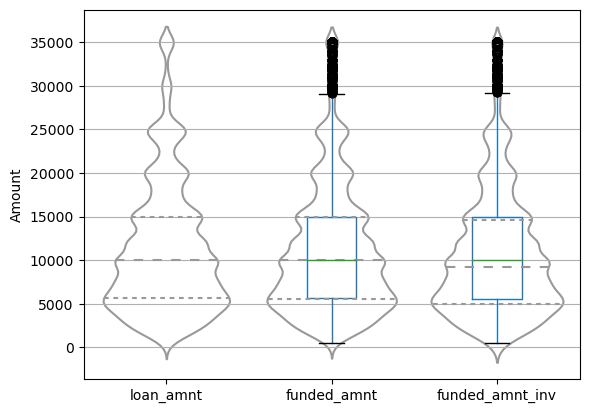

In [58]:
# violin plot for numerical values
ax=sns.violinplot(data=New_data[numeric_columns[2:5]],inner='quartile',color='white')
plt.show()

In [59]:
Q1 = New_data[numeric_columns[2:5]].quantile(0.25)
Q3 = New_data[numeric_columns[2:5]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt          9400.00000
funded_amnt        9500.00000
funded_amnt_inv    9603.06229
dtype: float64


In [60]:
New_data.shape

(37833, 45)

In [61]:
df = New_data[~((New_data[numeric_columns[2:5]] < (Q1 - 1.5 * IQR)) |(New_data[numeric_columns[2:5]] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(36618, 45)

### Univariate Analysis numerical Data

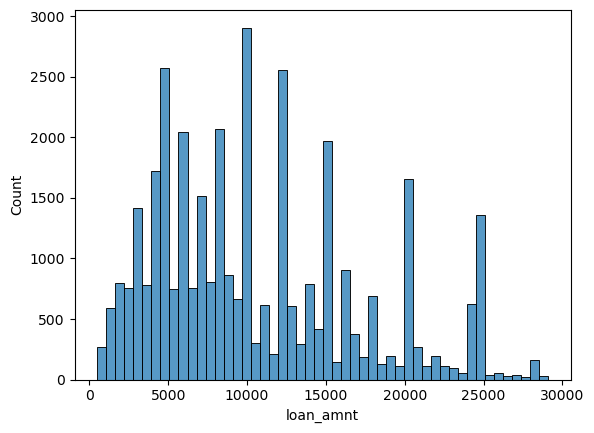

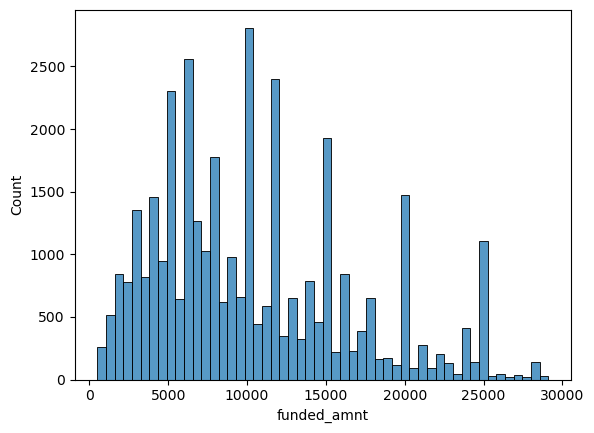

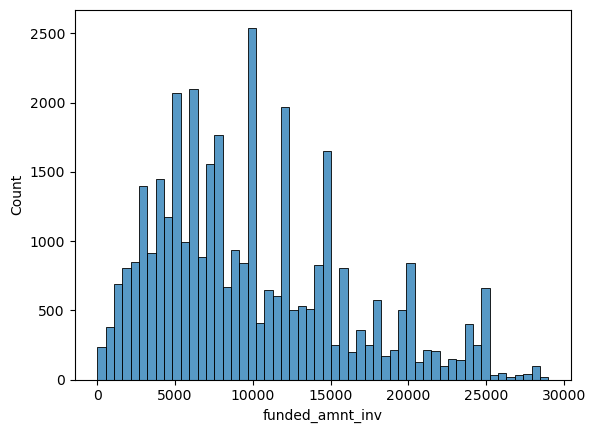

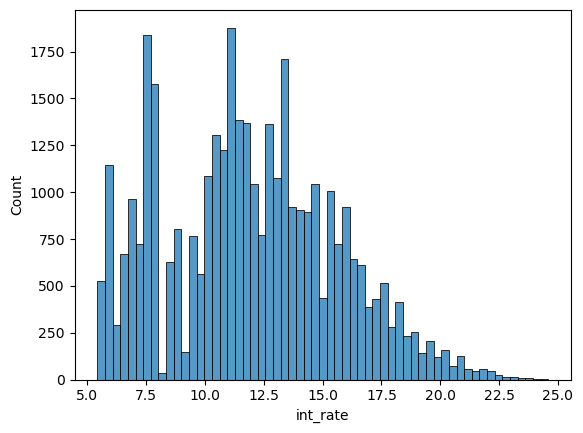

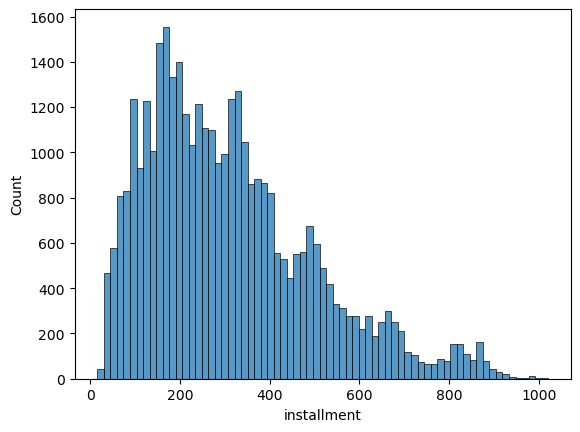

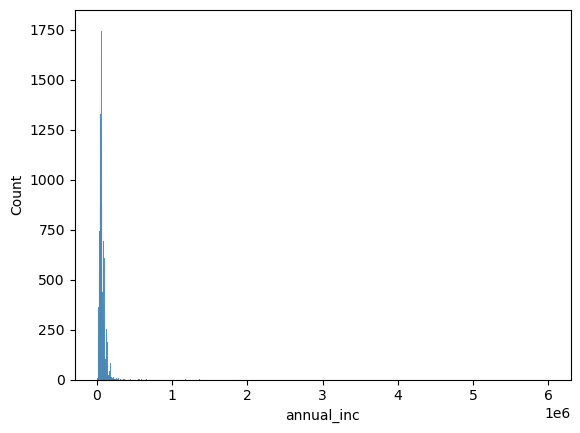

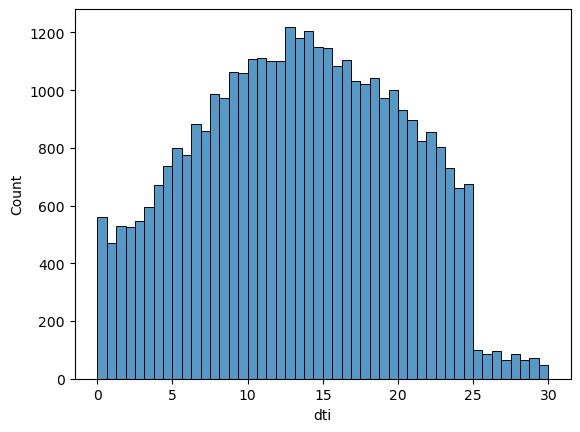

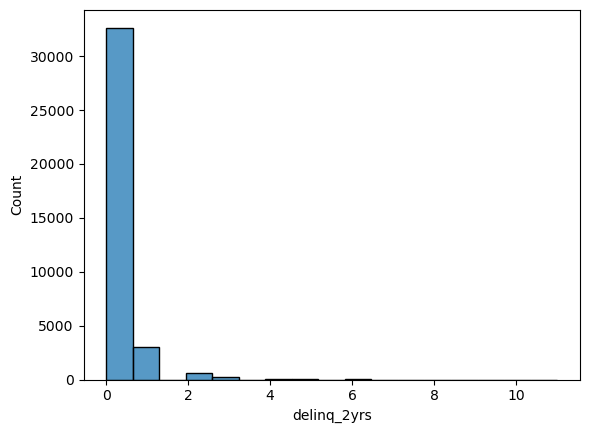

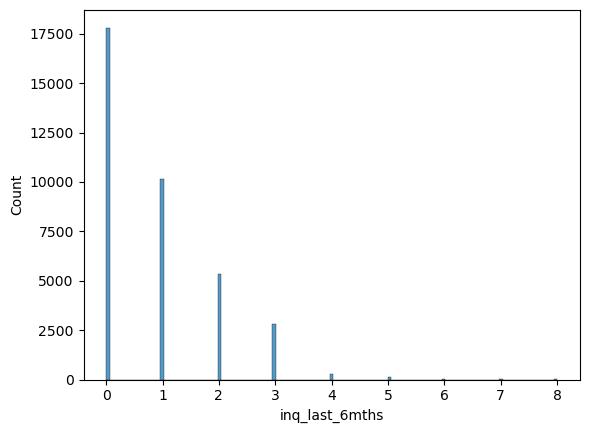

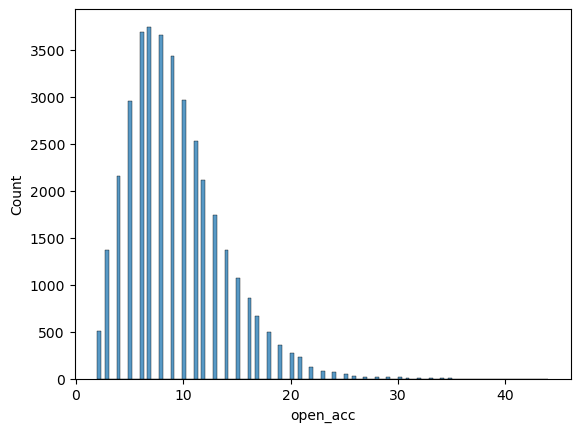

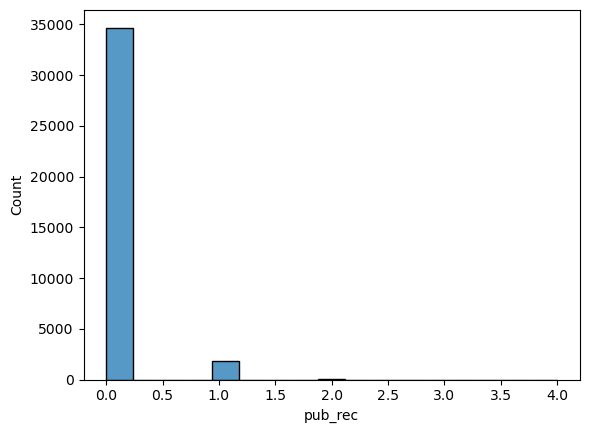

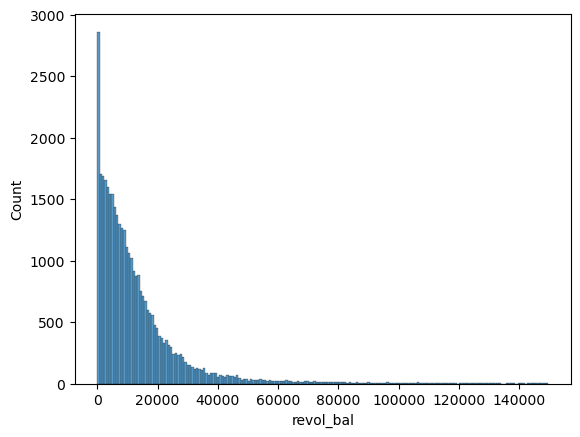

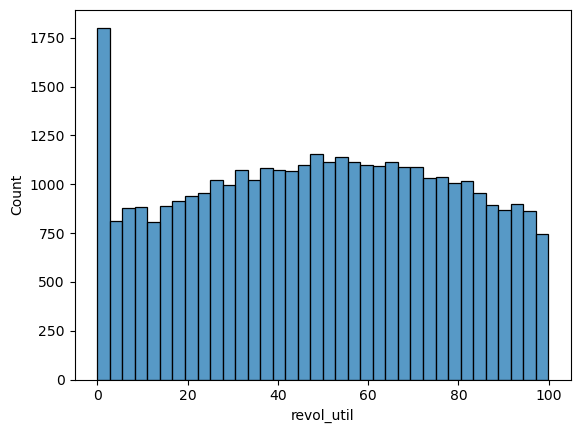

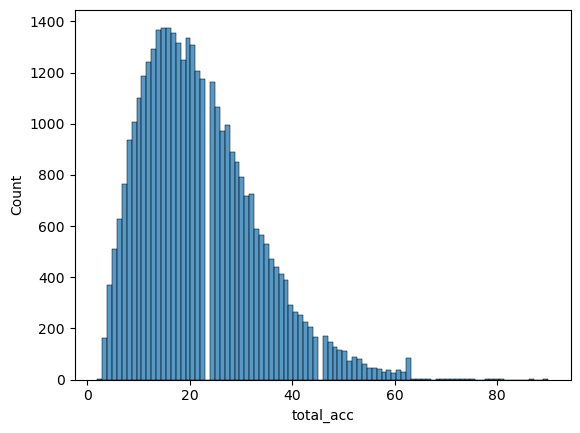

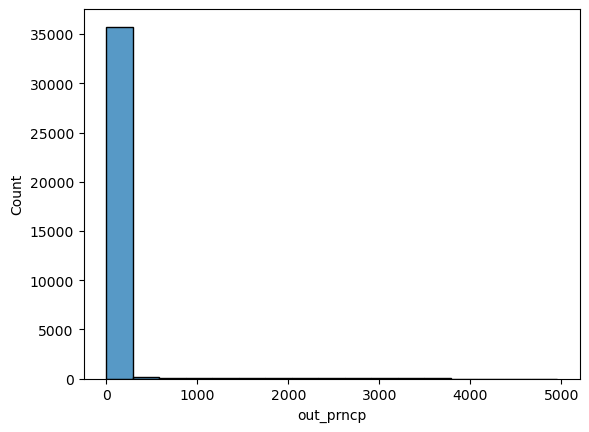

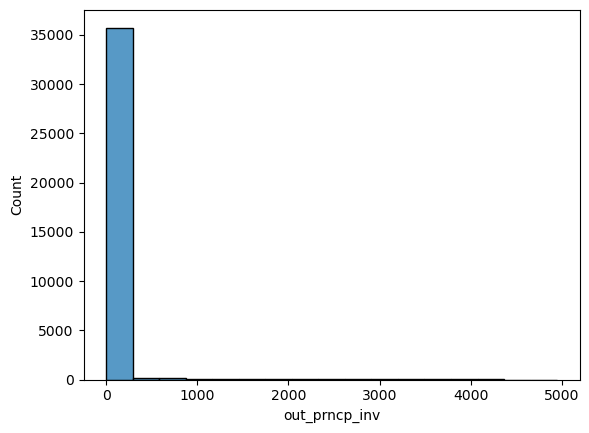

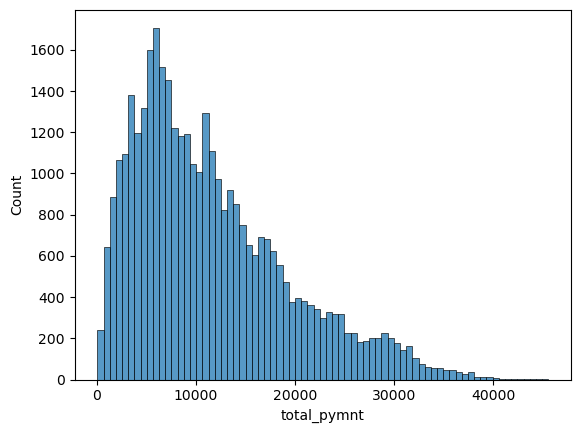

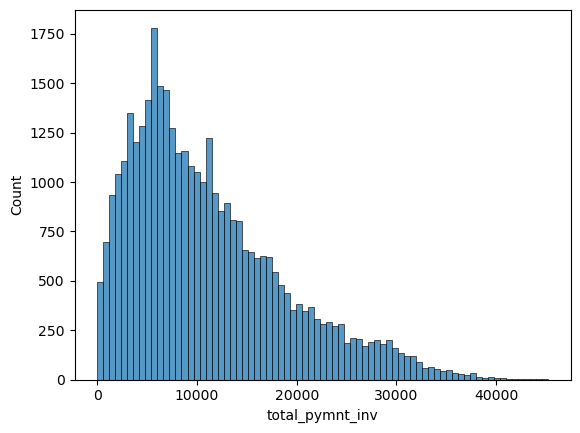

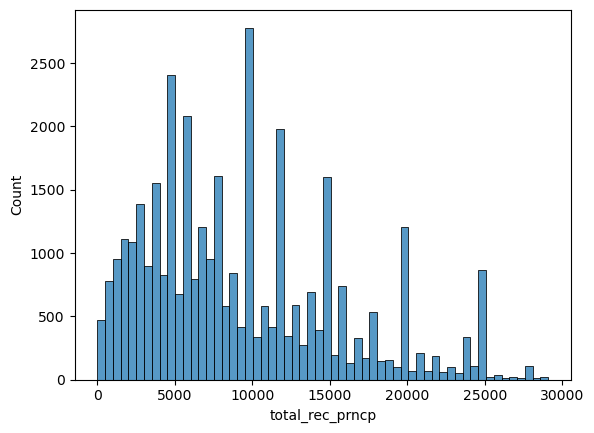

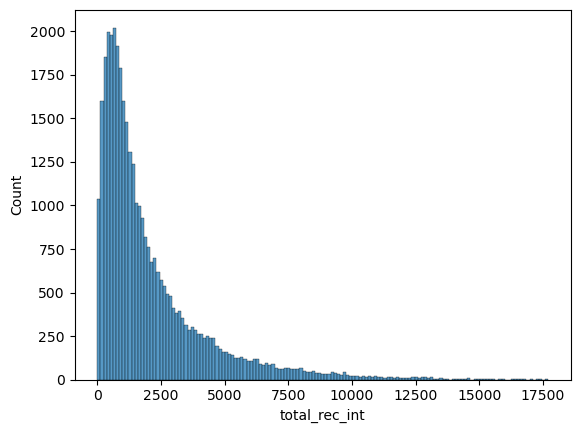

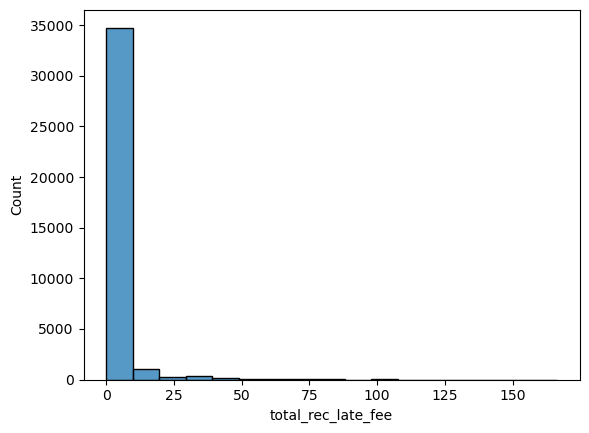

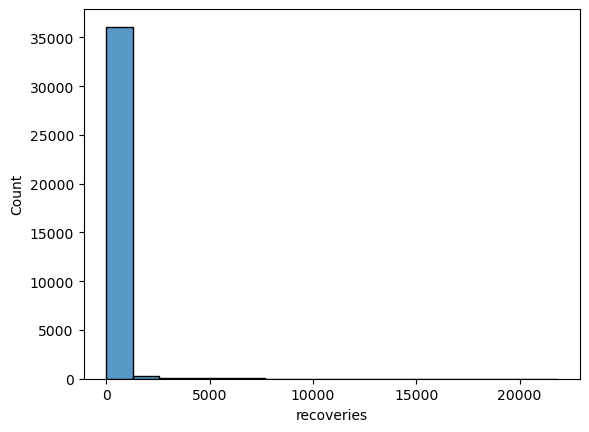

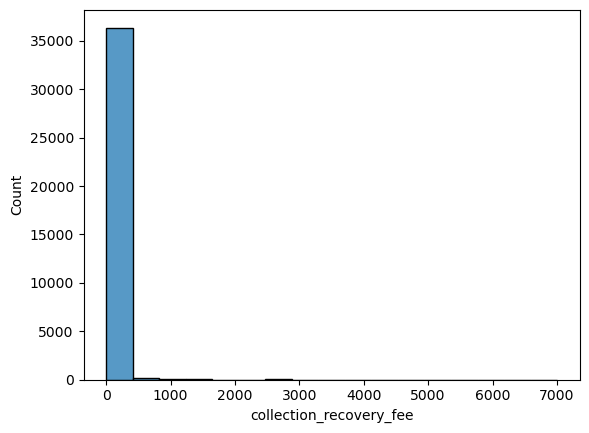

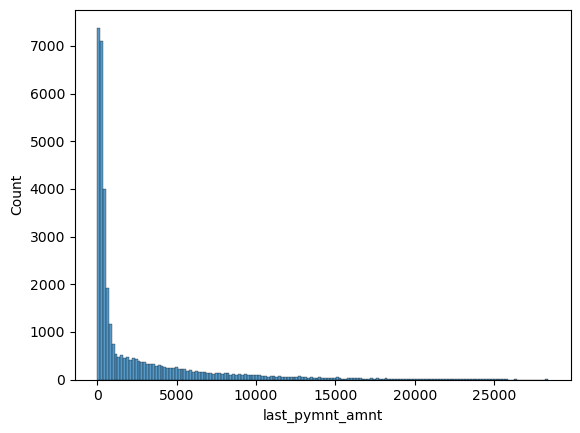

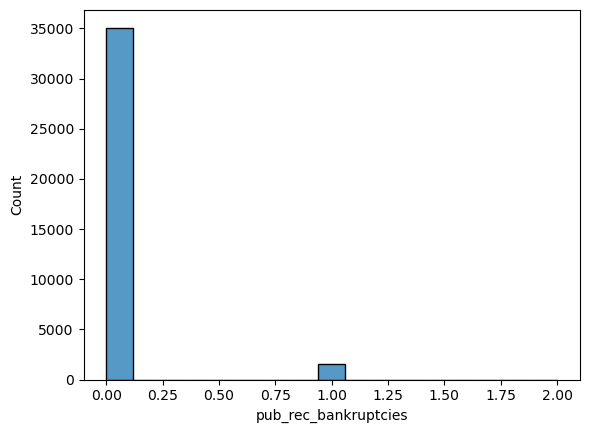

In [62]:
for col in numeric_columns[2:]:
    sns.histplot(x=df[col])
    plt.show()

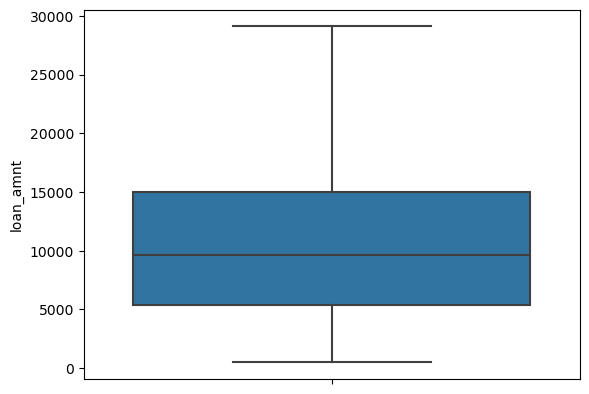

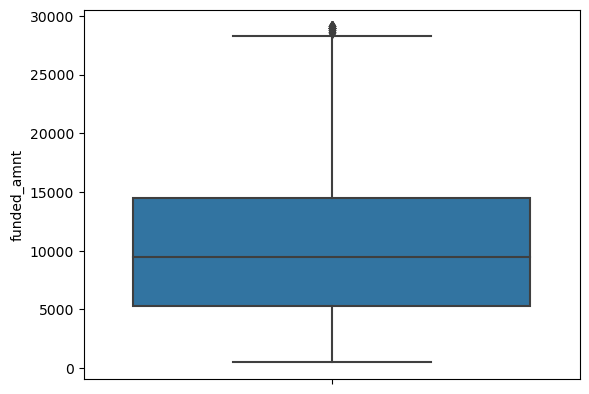

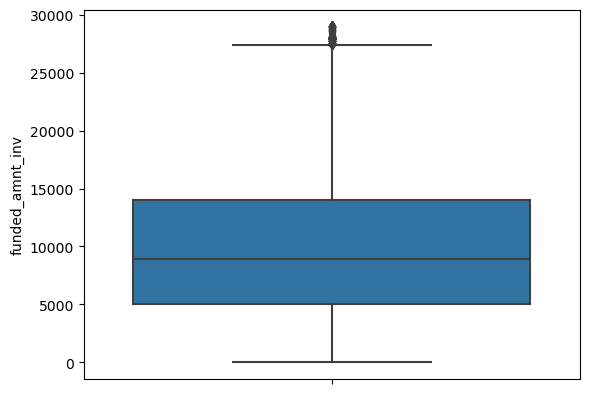

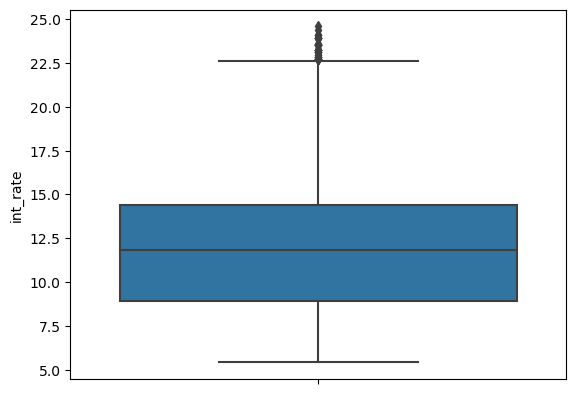

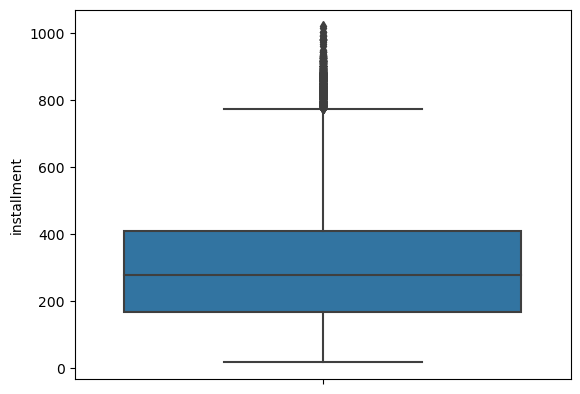

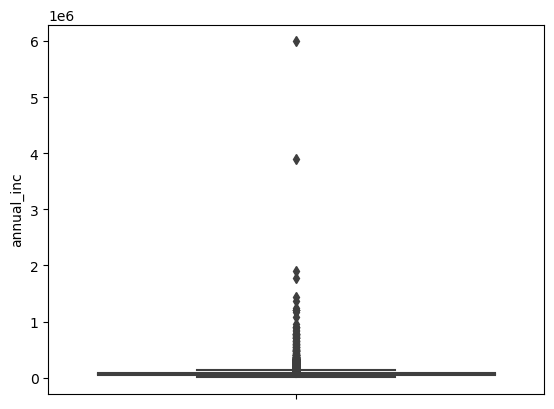

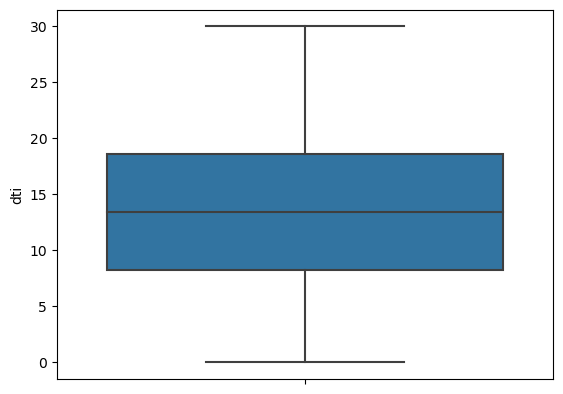

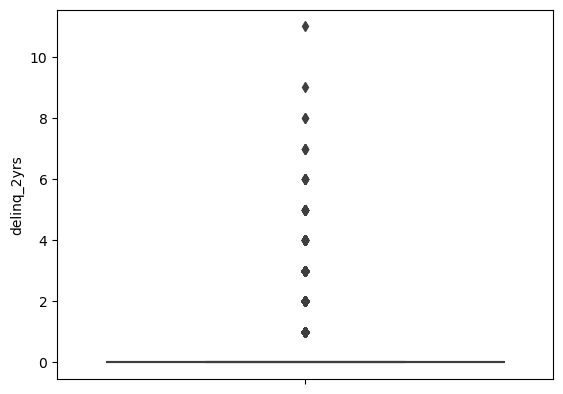

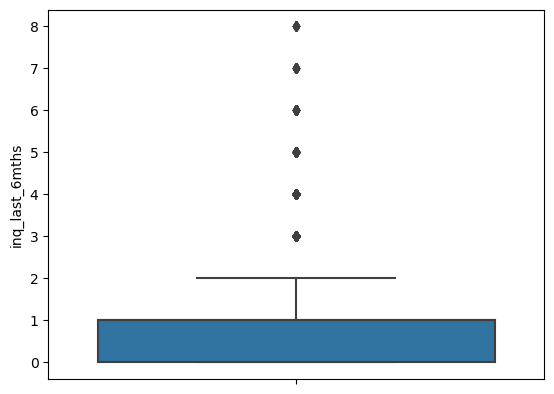

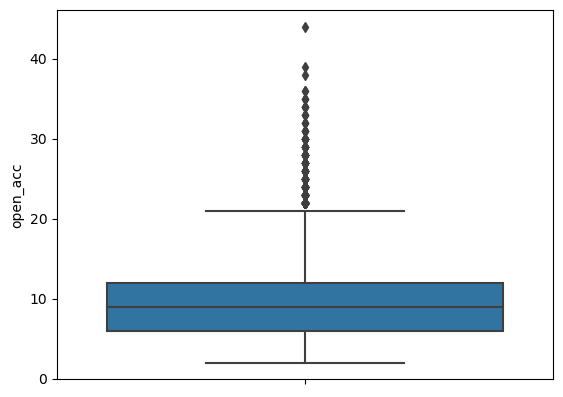

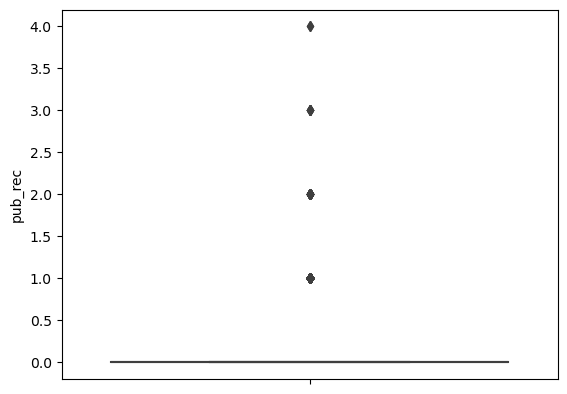

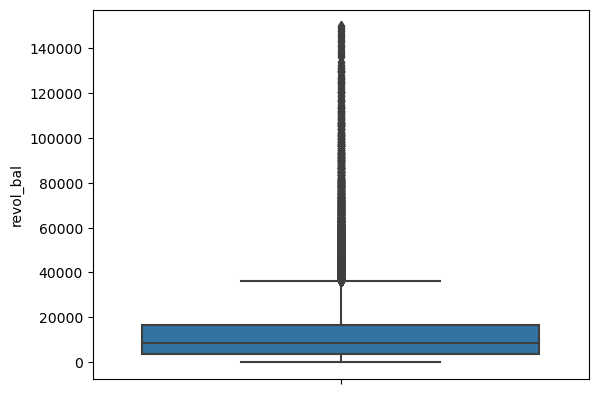

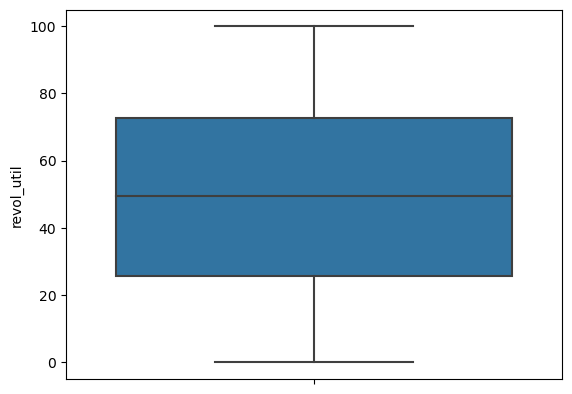

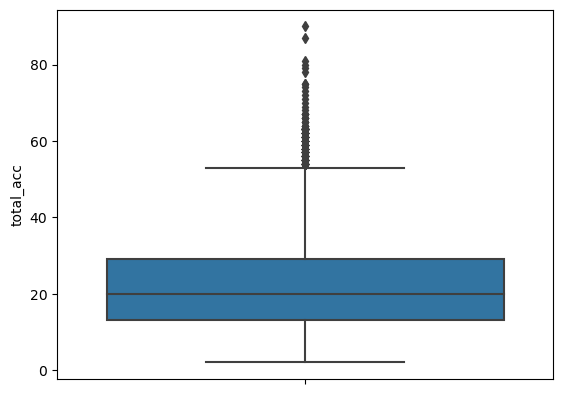

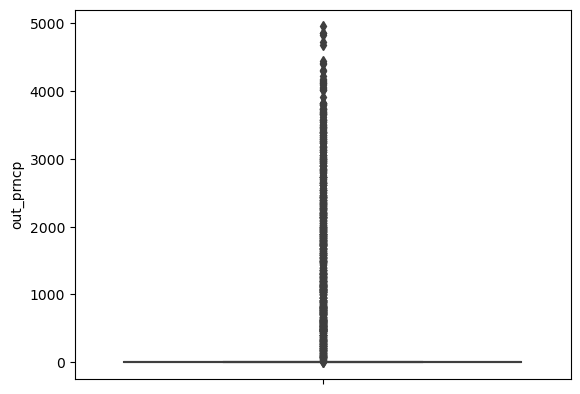

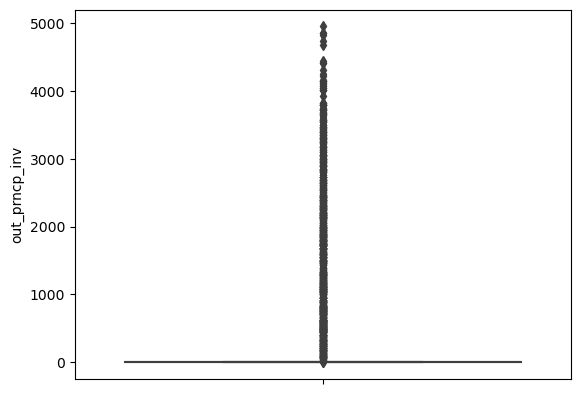

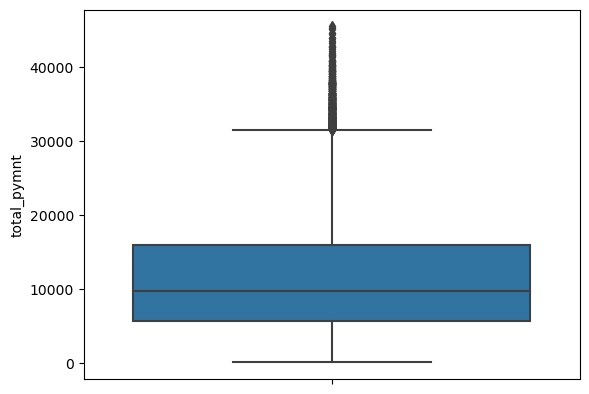

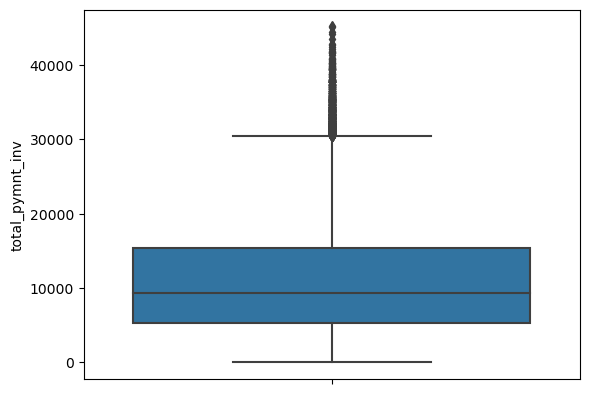

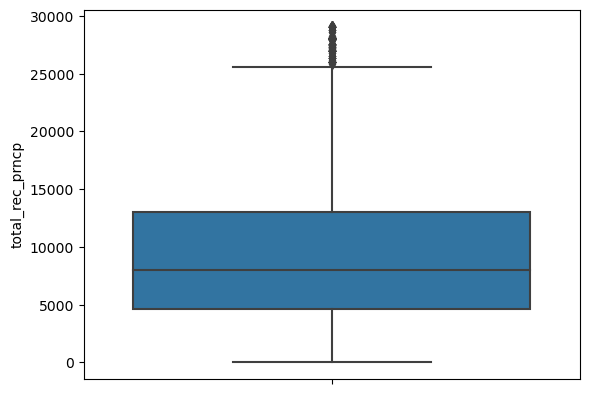

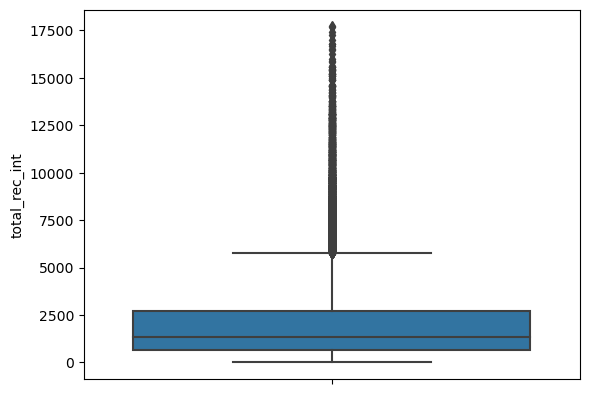

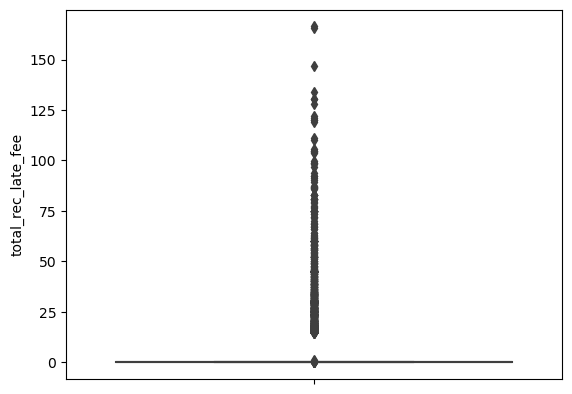

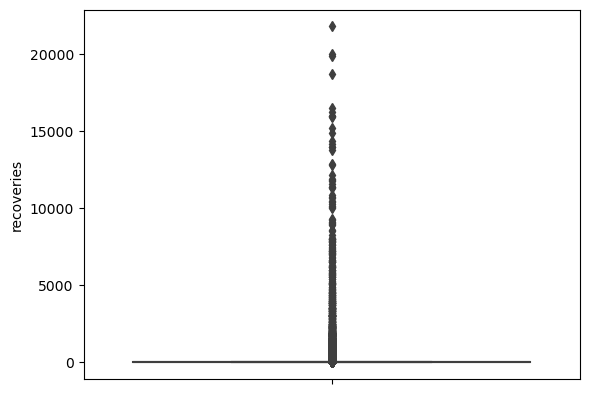

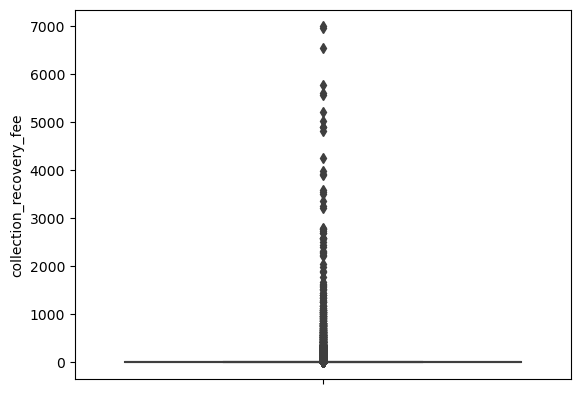

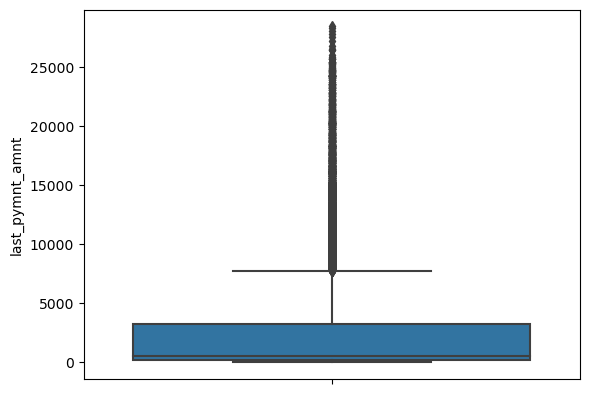

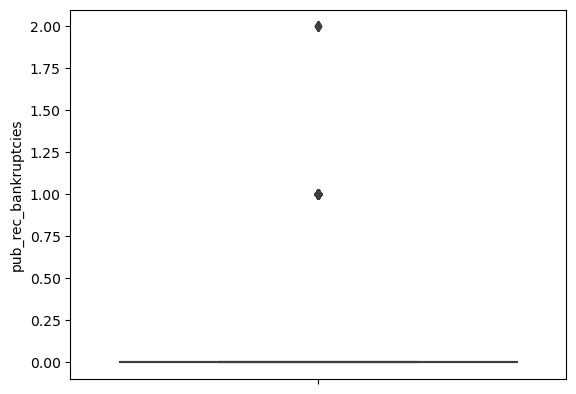

In [63]:
for col in numeric_columns[2:]:
    sns.boxplot(y=df[col])
    plt.show()

In [64]:
# annual income removing outlier
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

39204.0


In [65]:
df = df[~((df['annual_inc'] < (Q1 - 1.5 * IQR)) |(df['annual_inc'] > (Q3 + 1.5 * IQR)))]

In [66]:
df.shape

(34793, 45)

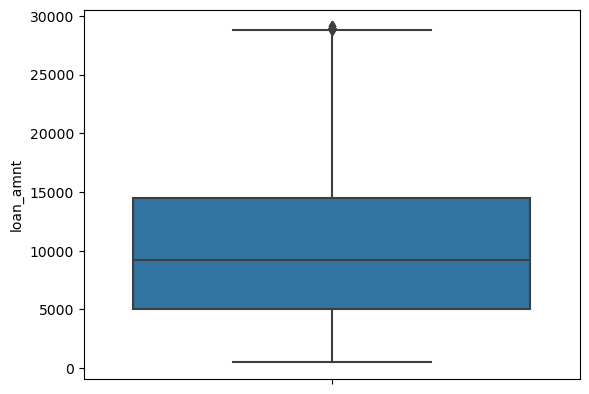

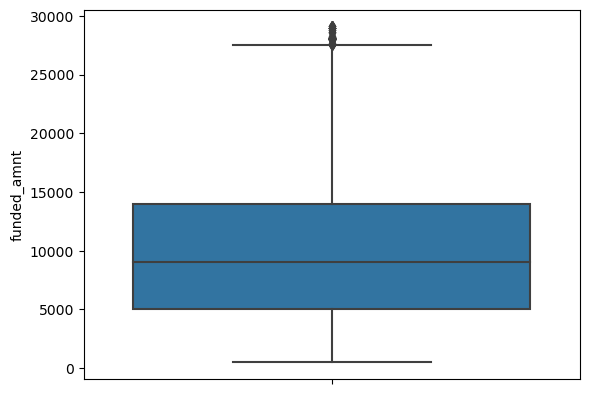

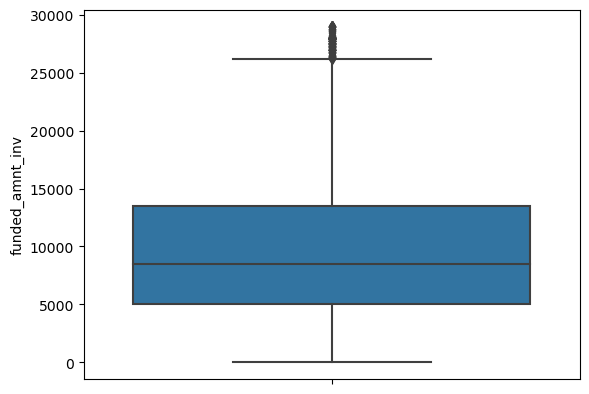

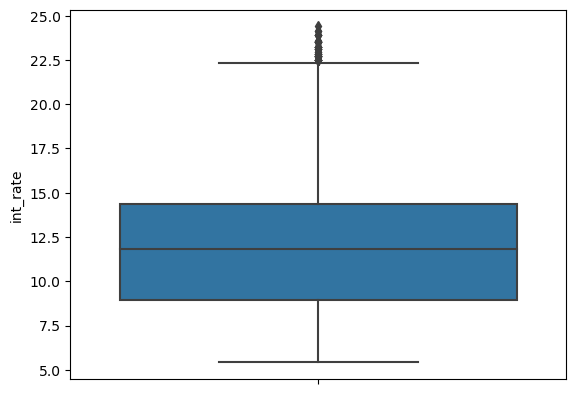

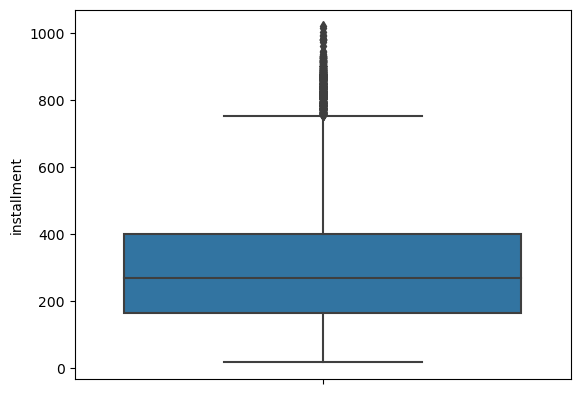

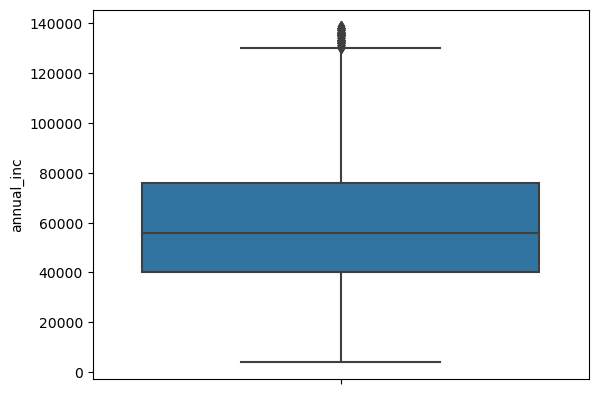

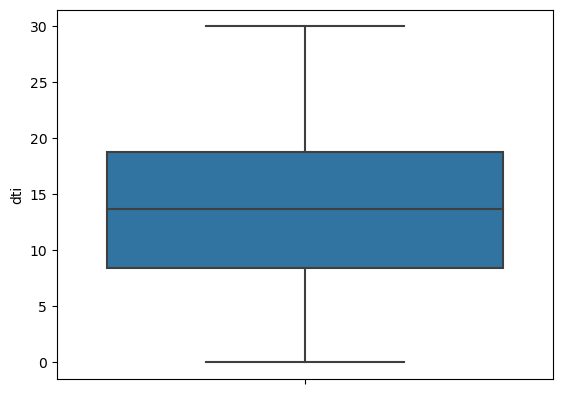

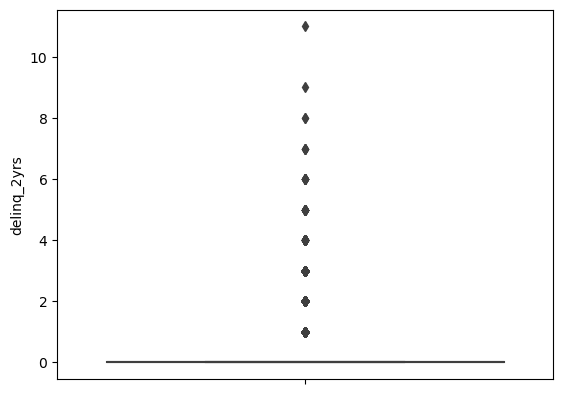

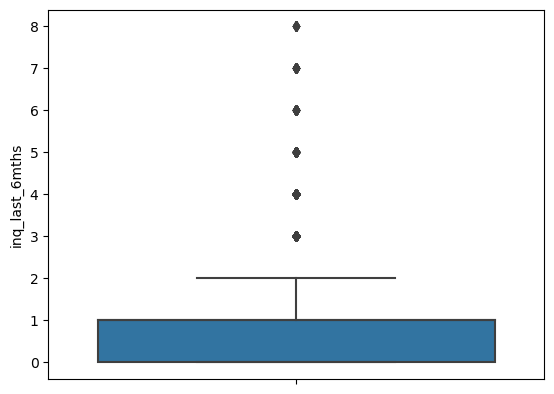

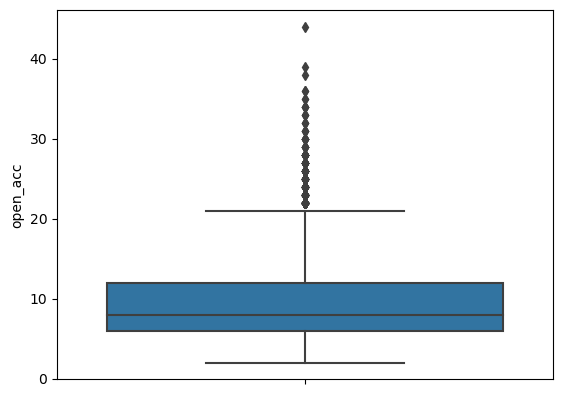

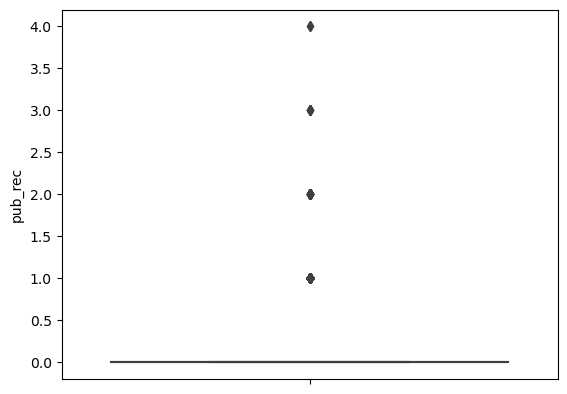

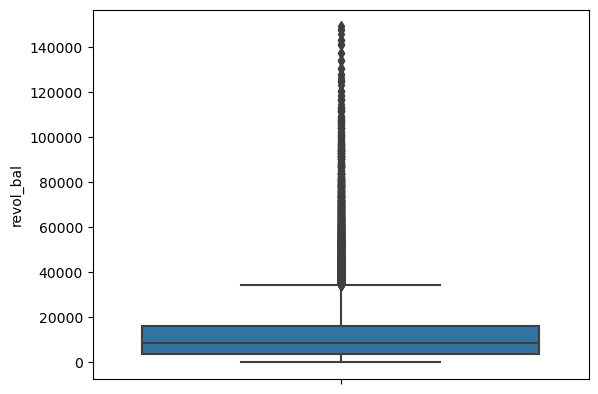

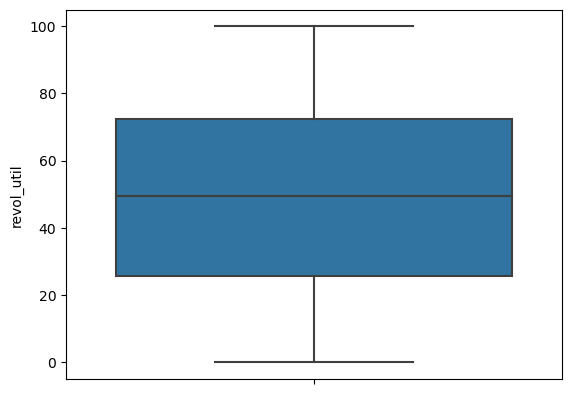

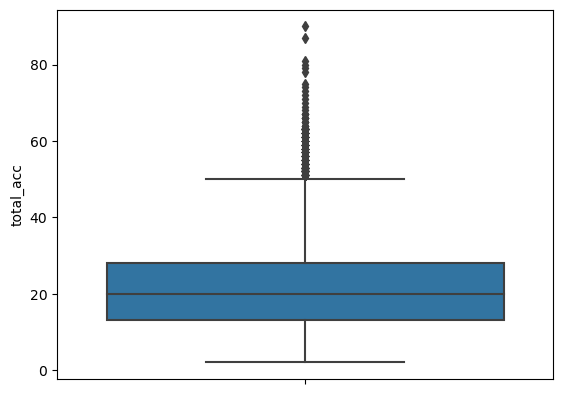

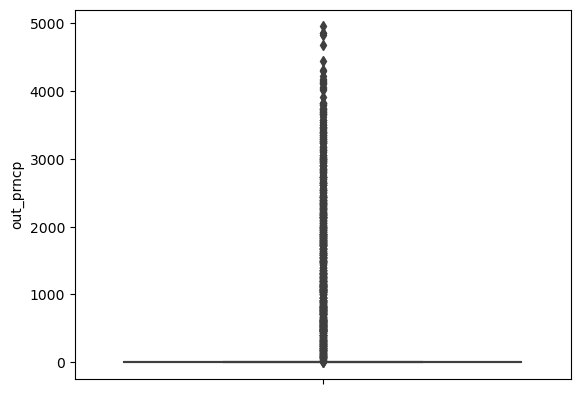

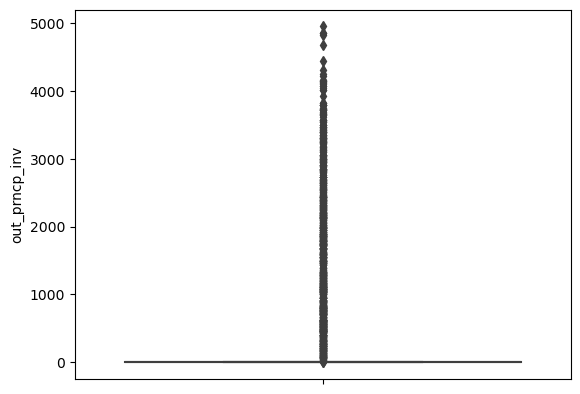

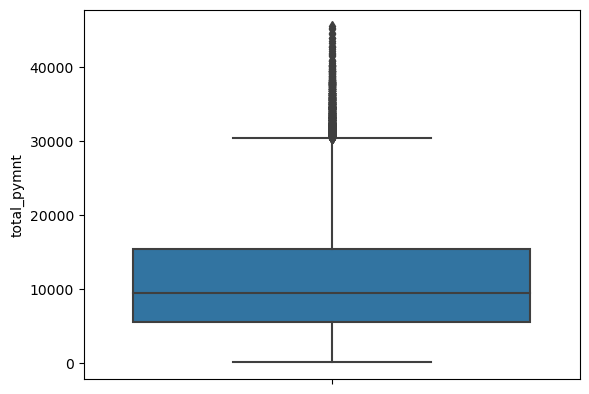

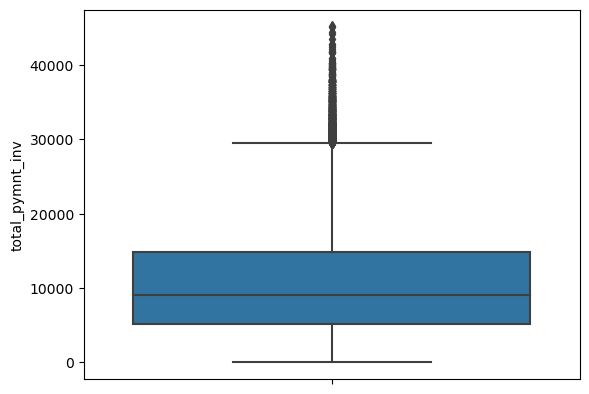

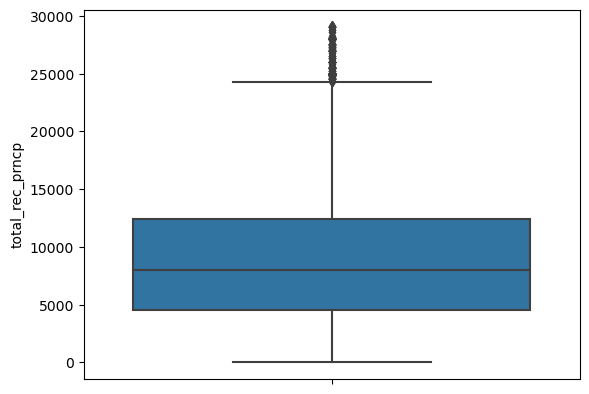

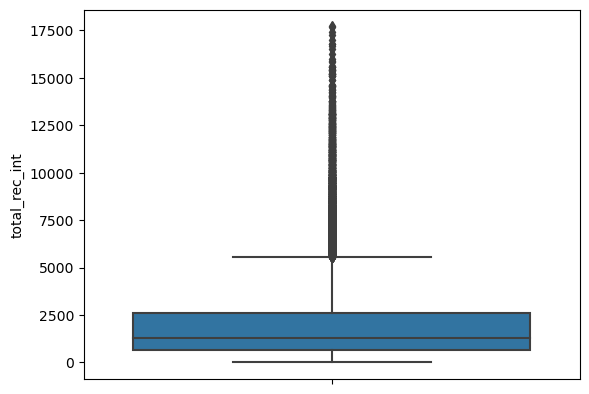

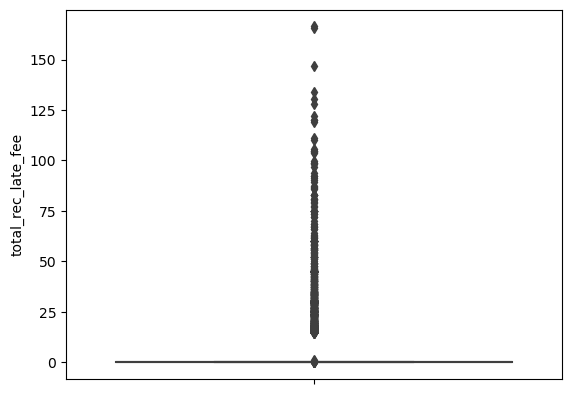

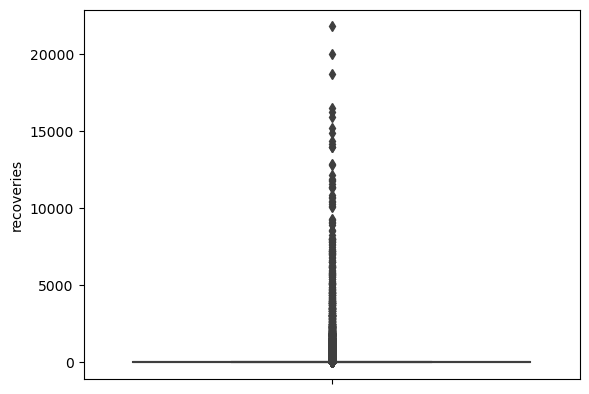

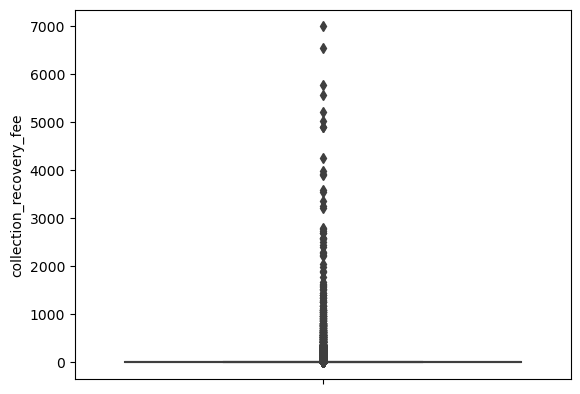

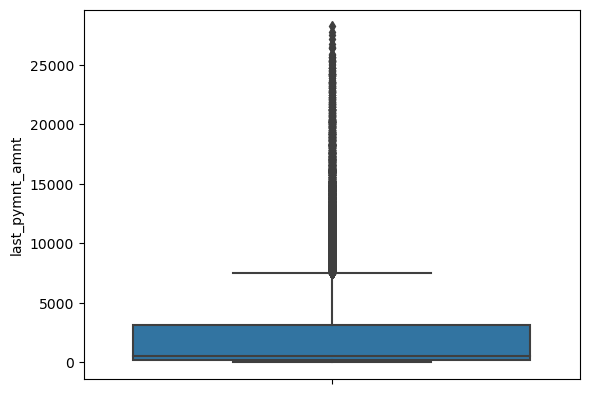

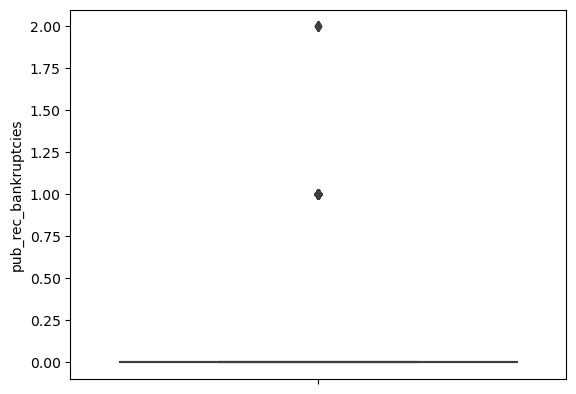

In [67]:
for col in numeric_columns[2:]:
    sns.boxplot(y=df[col])
    plt.show()

### Univariate Analysis Categorical

In [68]:
categorical_columns

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type']

In [69]:
df[categorical_columns].nunique()

term                       2
grade                      7
sub_grade                 35
emp_length                11
home_ownership             4
verification_status        3
loan_status                3
pymnt_plan                 1
purpose                   14
title                  17534
zip_code                 801
addr_state                48
initial_list_status        1
application_type           1
dtype: int64

#### Dropping the  below columns 
title <br>
zipcode <br>
initial_list_status <br>
application_type <br>
pymnt_plan <br>

In [70]:
df=df.drop(['title','zip_code','initial_list_status','application_type','pymnt_plan'],axis=1)

In [71]:
df=df.drop(['sub_grade','addr_state'],axis=1)

In [72]:
categorical_columns=[Columns for Columns in df.columns if df[Columns].dtypes=="O"]

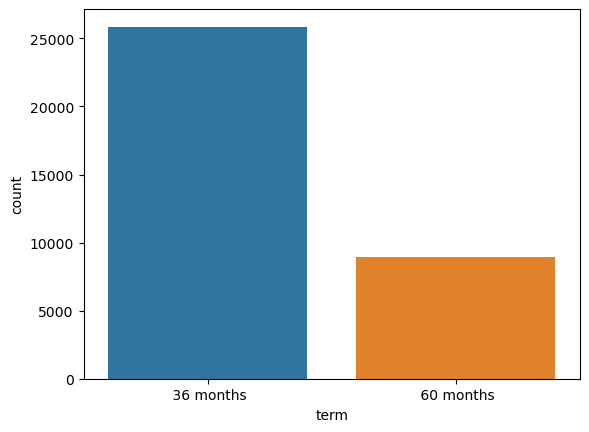

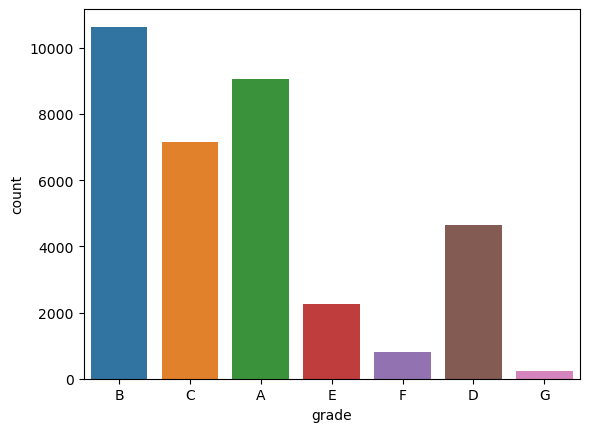

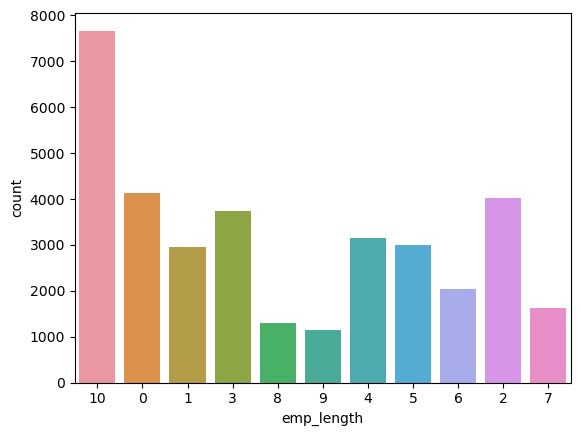

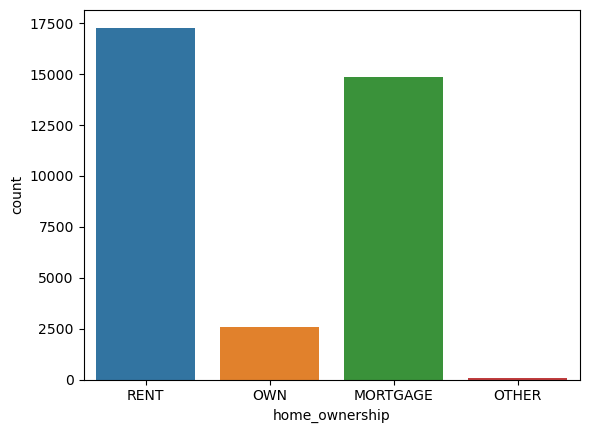

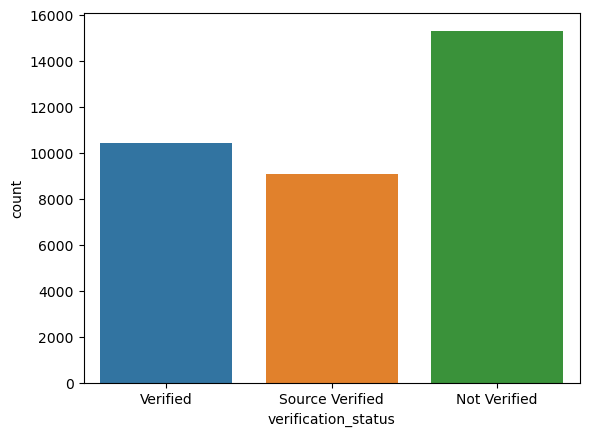

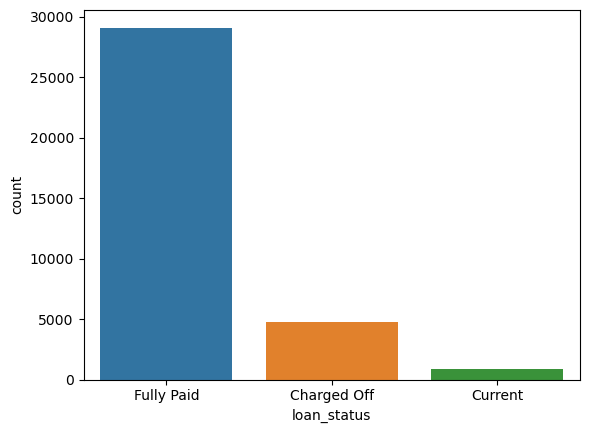

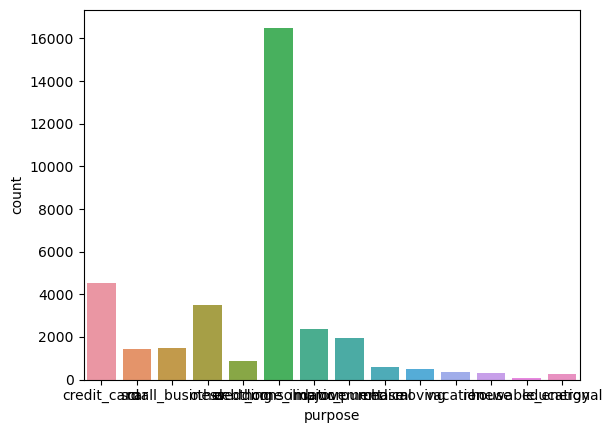

In [73]:
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.show()

### Bivariate Analysis

####  categorical Vs categorical

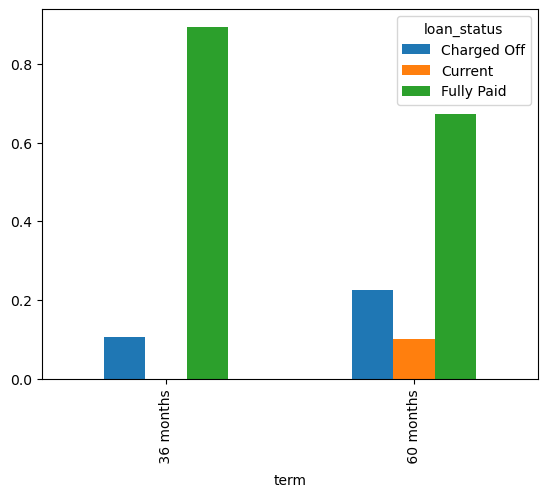

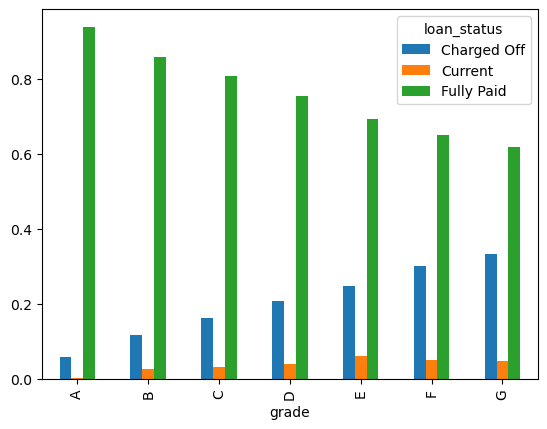

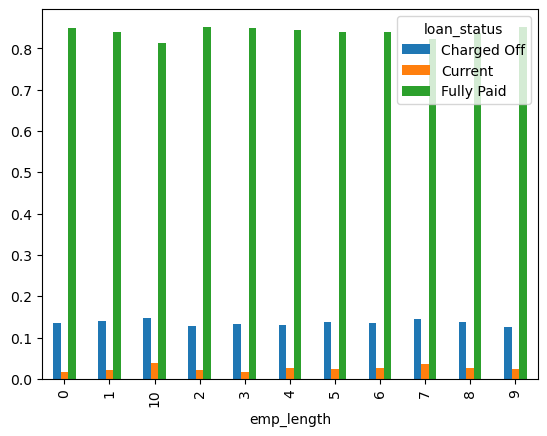

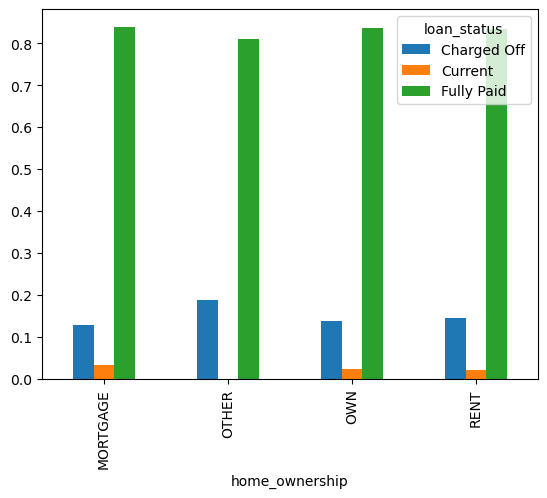

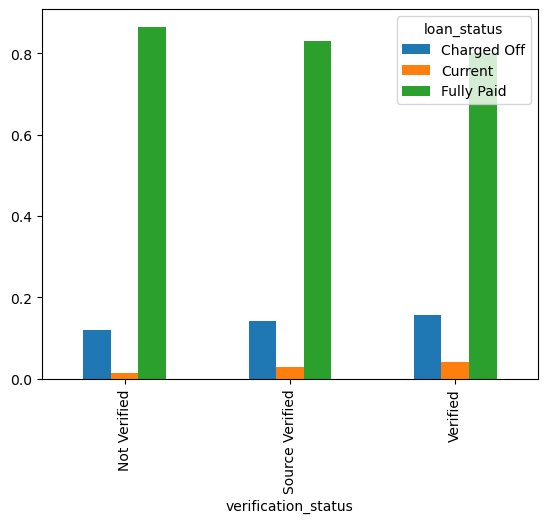

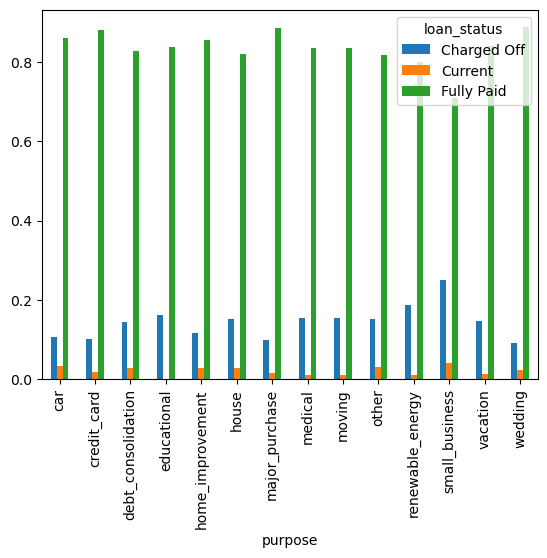

In [74]:
#pivot table 
for Columns in categorical_columns:
    if Columns!='loan_status':
        df1=pd.DataFrame()
        df1[Columns]=df[Columns]
        df1['loan_status']=df['loan_status']
        pivottable=df1.pivot_table(index=Columns,columns='loan_status',aggfunc=lambda x : len(x),margins=True)
        df2=pivottable.drop('All',axis=0).copy()
        df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
        df2.loc[:,'Charged Off':'Fully Paid'].plot.bar()
        plt.show()

#### Numerical Vs Categorical

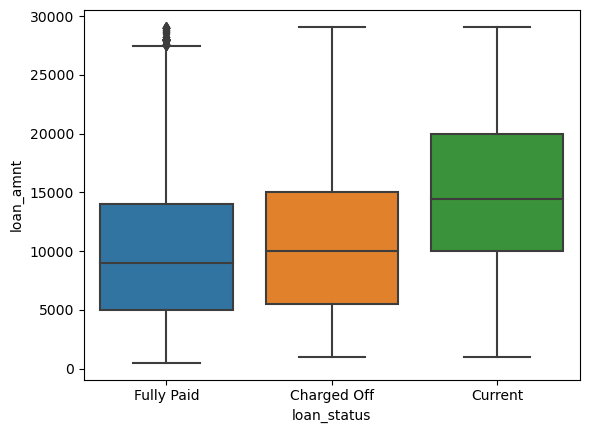

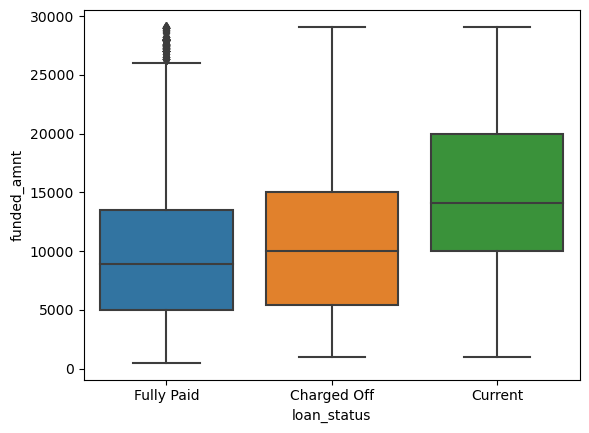

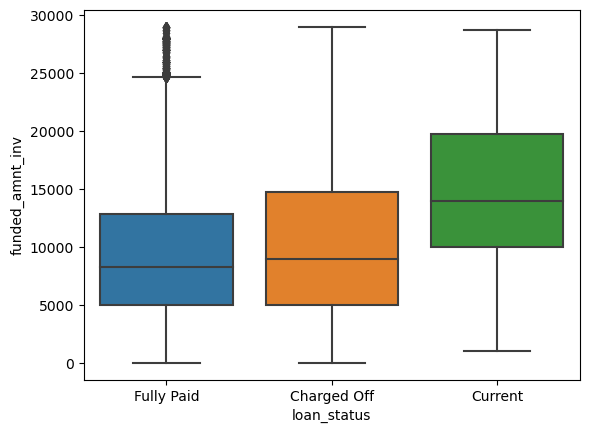

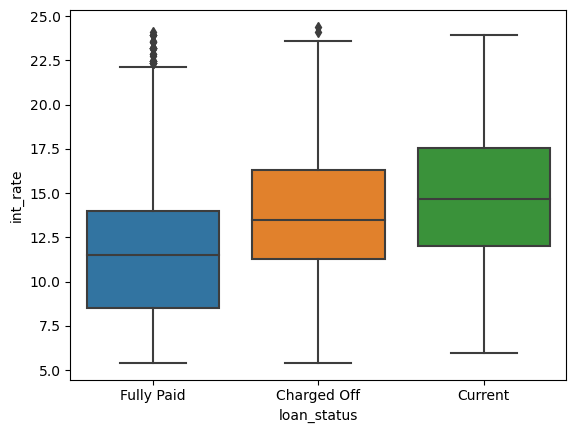

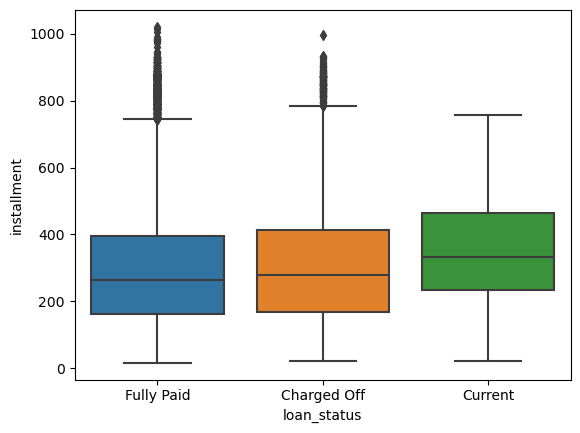

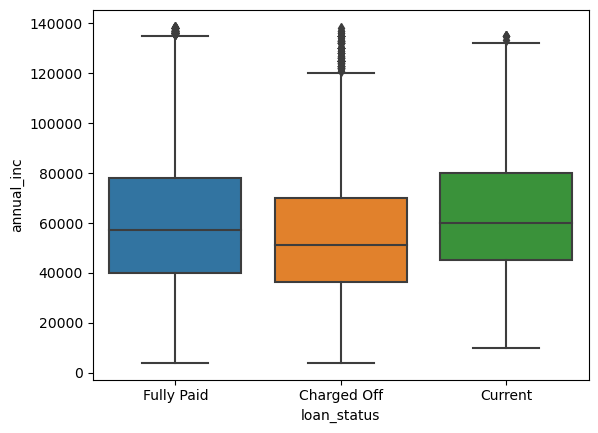

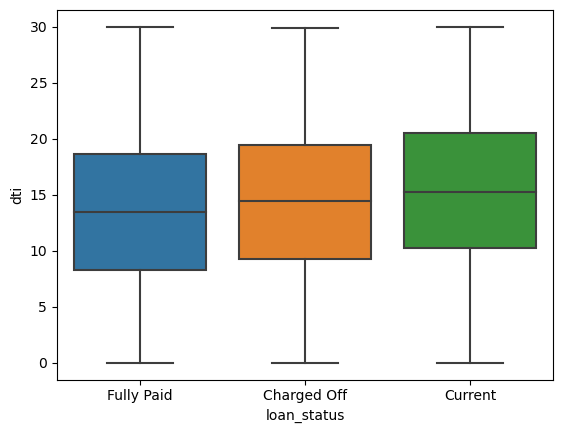

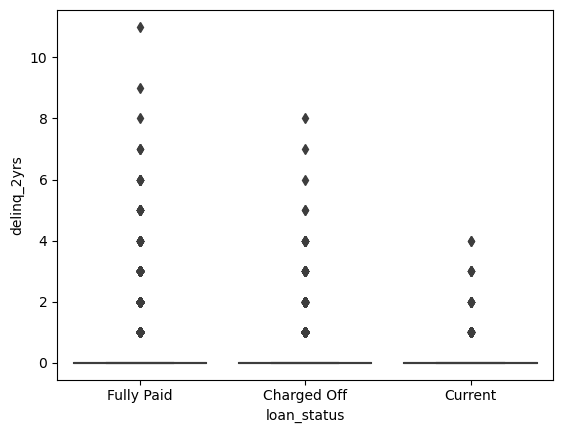

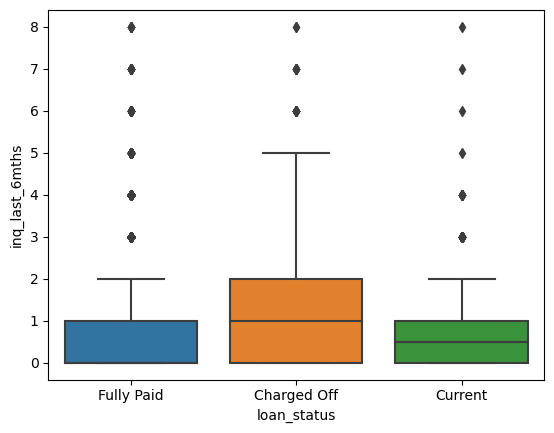

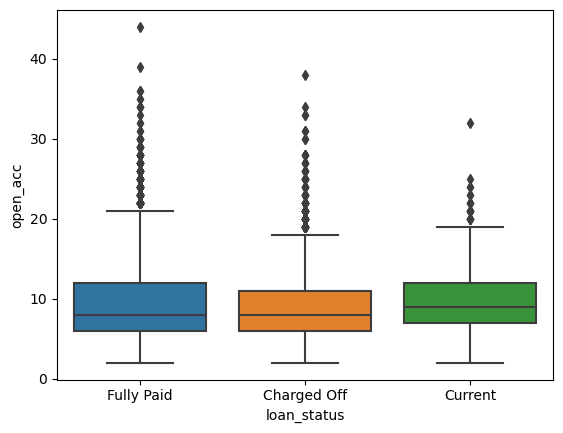

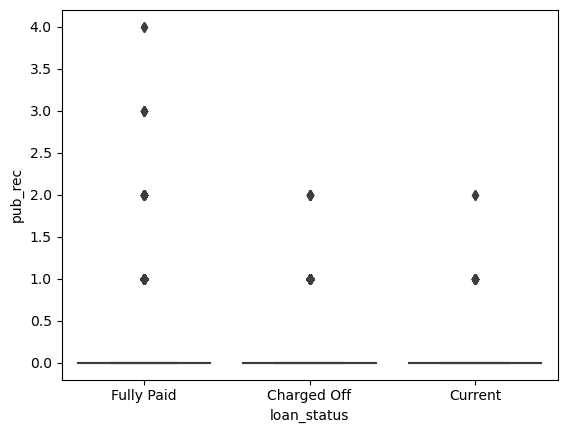

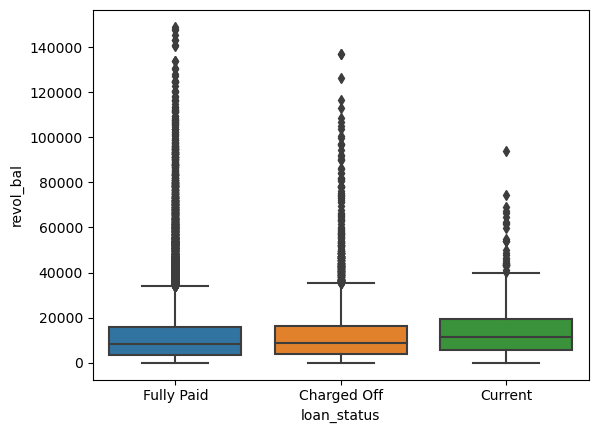

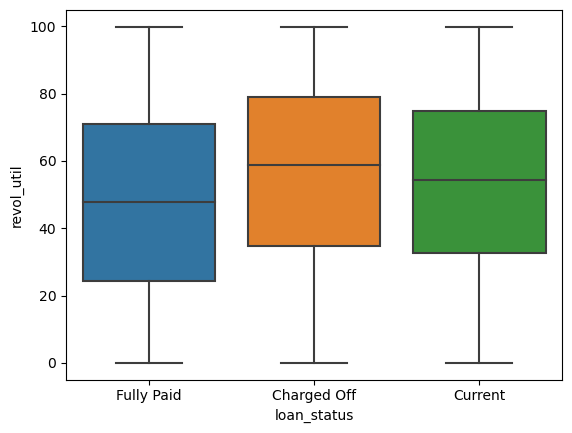

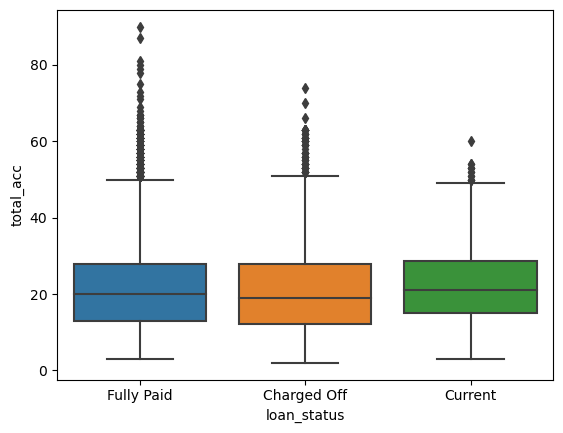

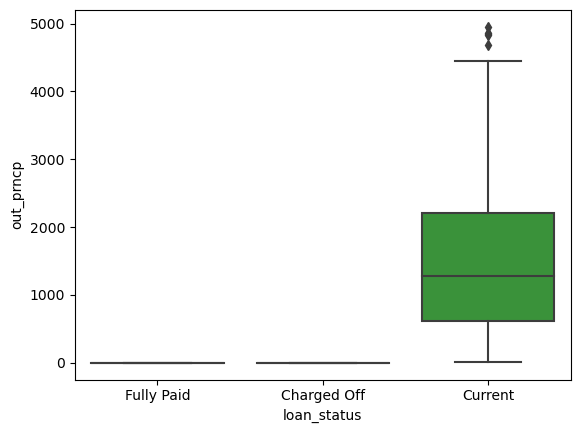

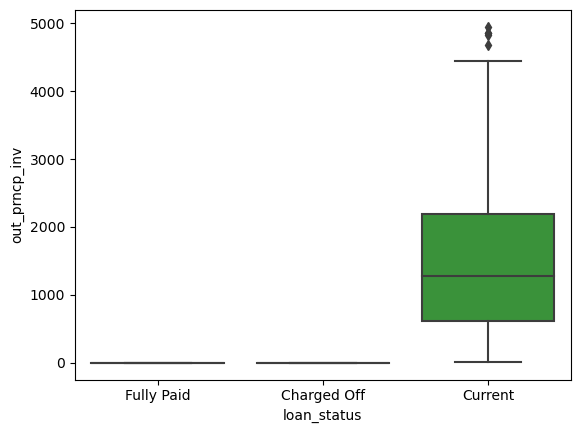

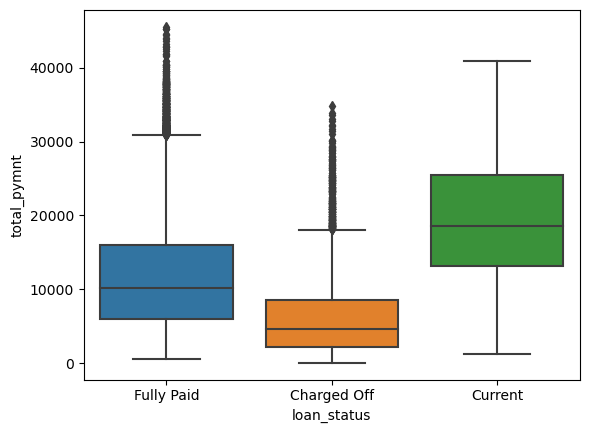

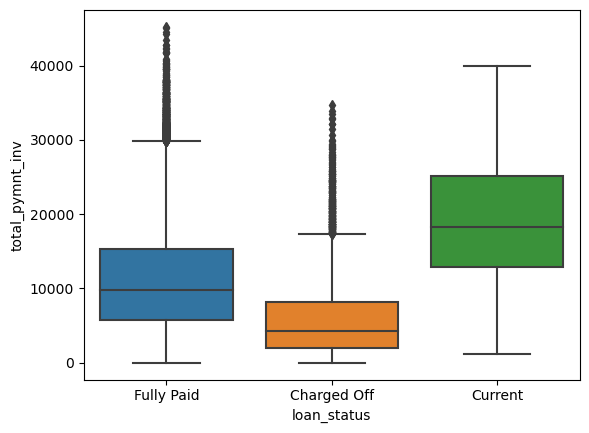

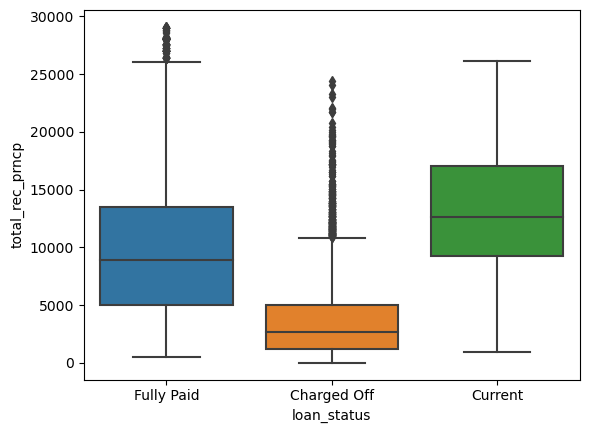

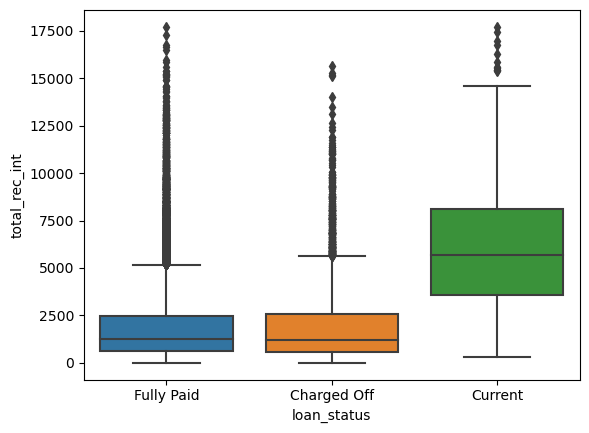

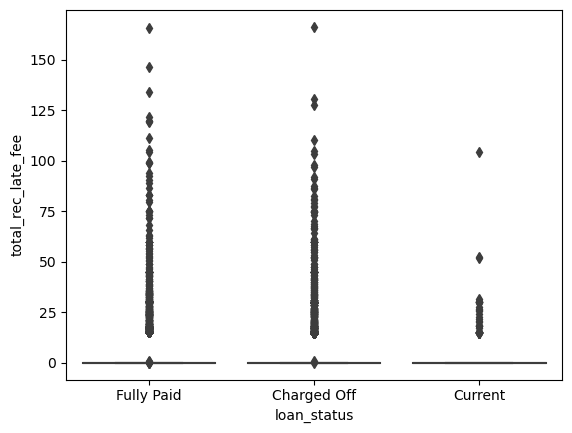

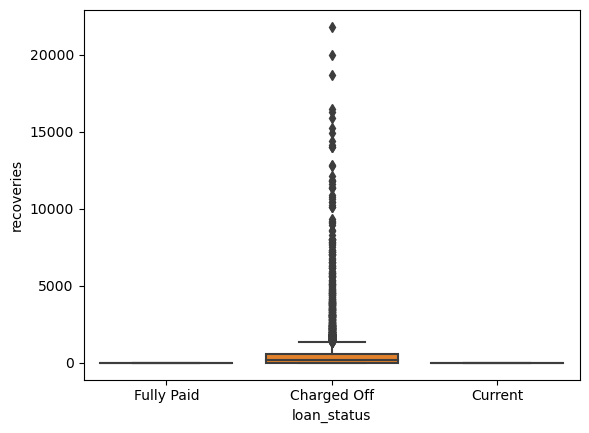

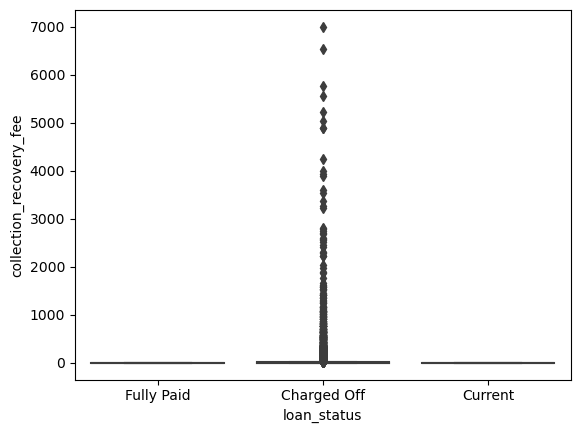

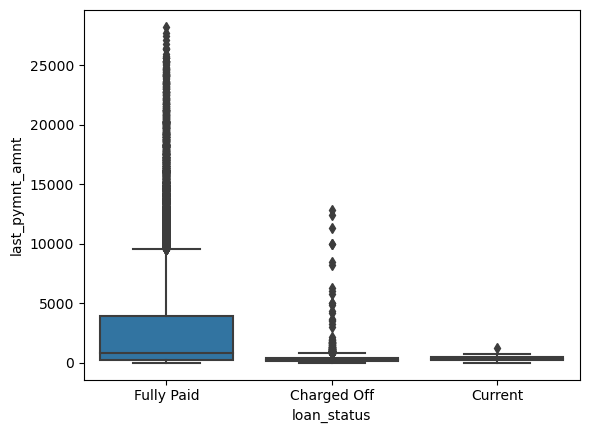

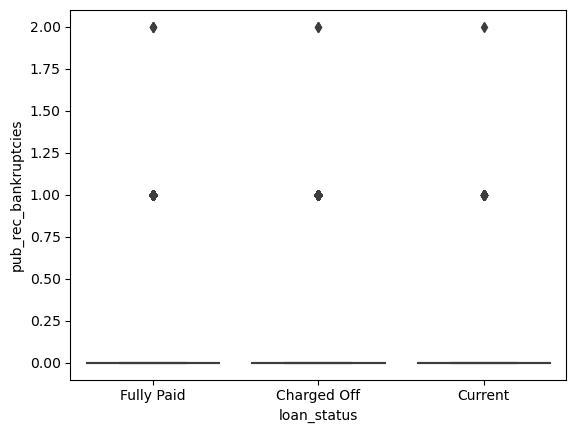

In [75]:
for col1 in ['loan_status']:
    for col2 in numeric_columns[2:]:
        sns.boxplot(x=df[col1],y=df[col2])
        plt.show()

#### Numerical Vs Numerical

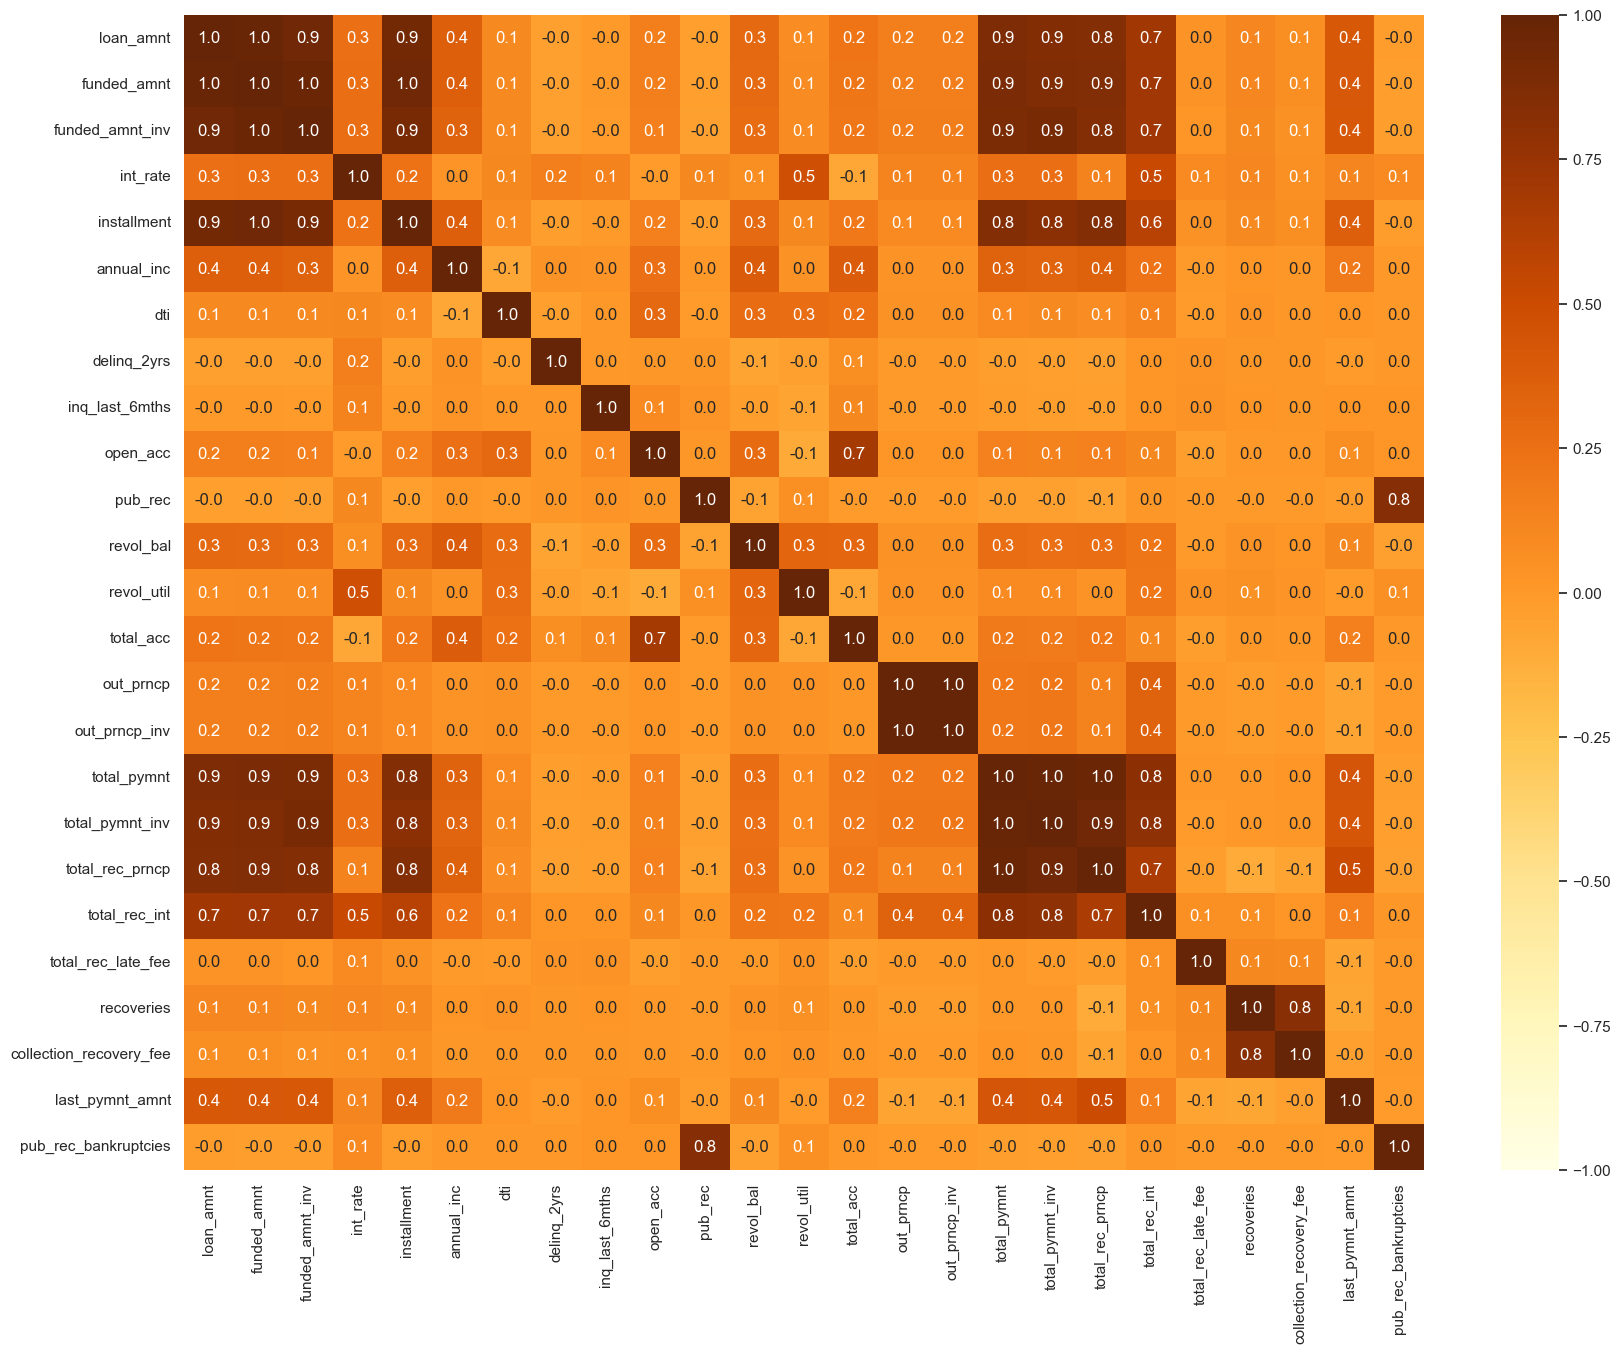

In [88]:
width = 15
height = 15
sns.heatmap(df[numeric_columns[2:]].corr(),vmin=-1,vmax=1,annot=True,fmt='.1f',cmap="YlOrBr")
sns.set(rc = {'figure.figsize':(width, height)})
plt.show()

In [89]:
other_columns=['delinq_2yrs','inq_last_6mths','pub_rec','pub_rec_bankruptcies']

In [90]:
df[other_columns]=df[other_columns].astype(object)

C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)


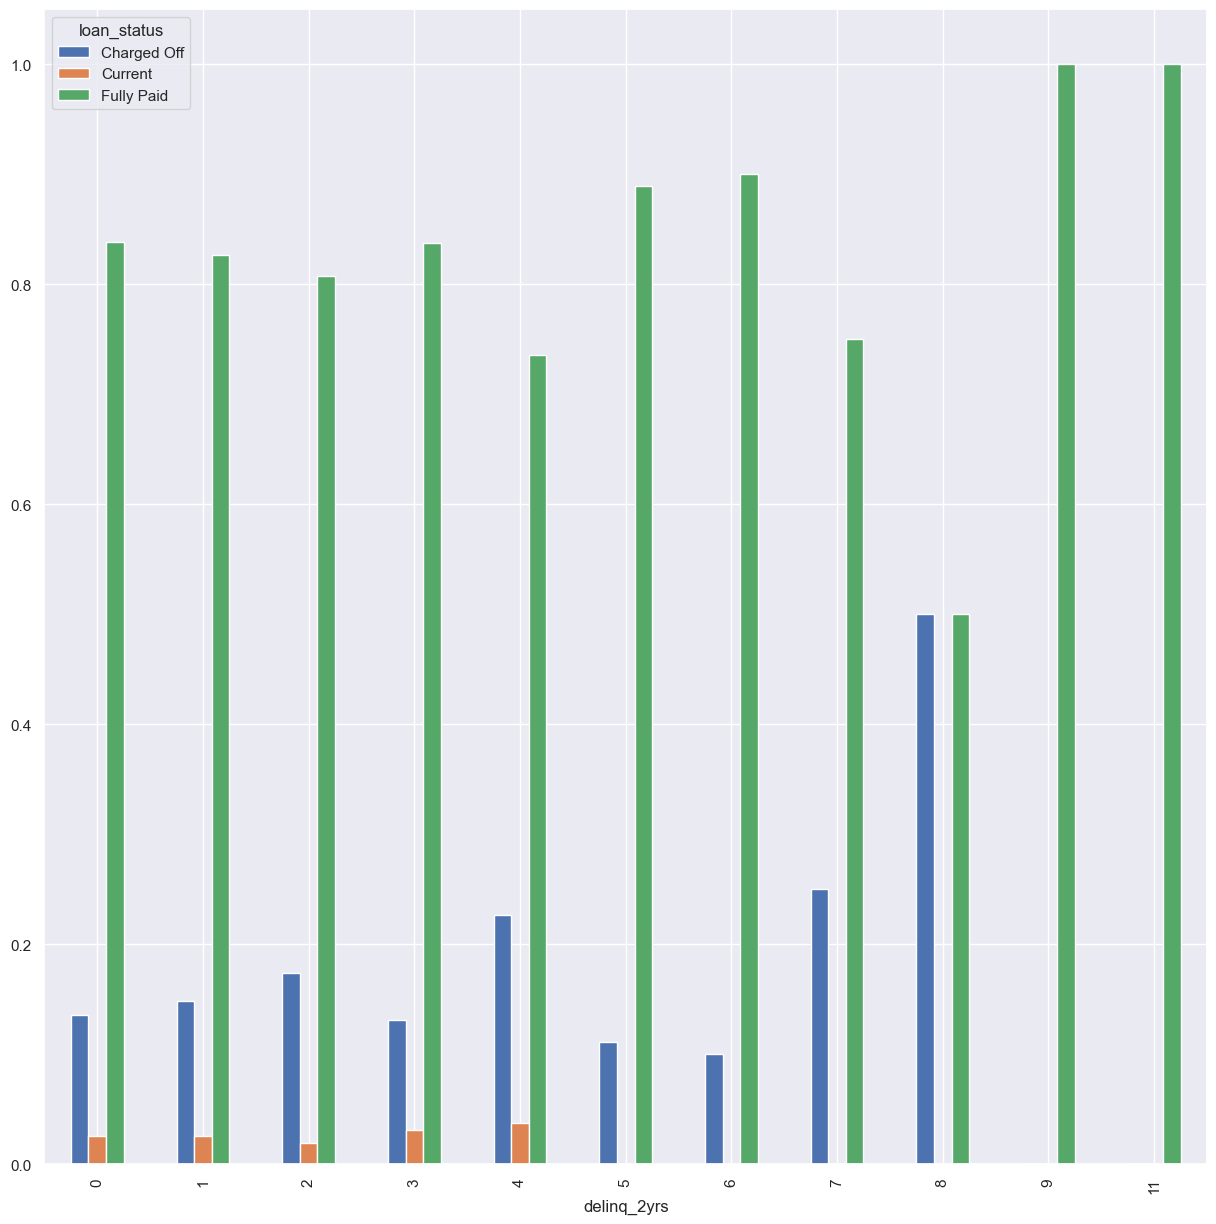

C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)


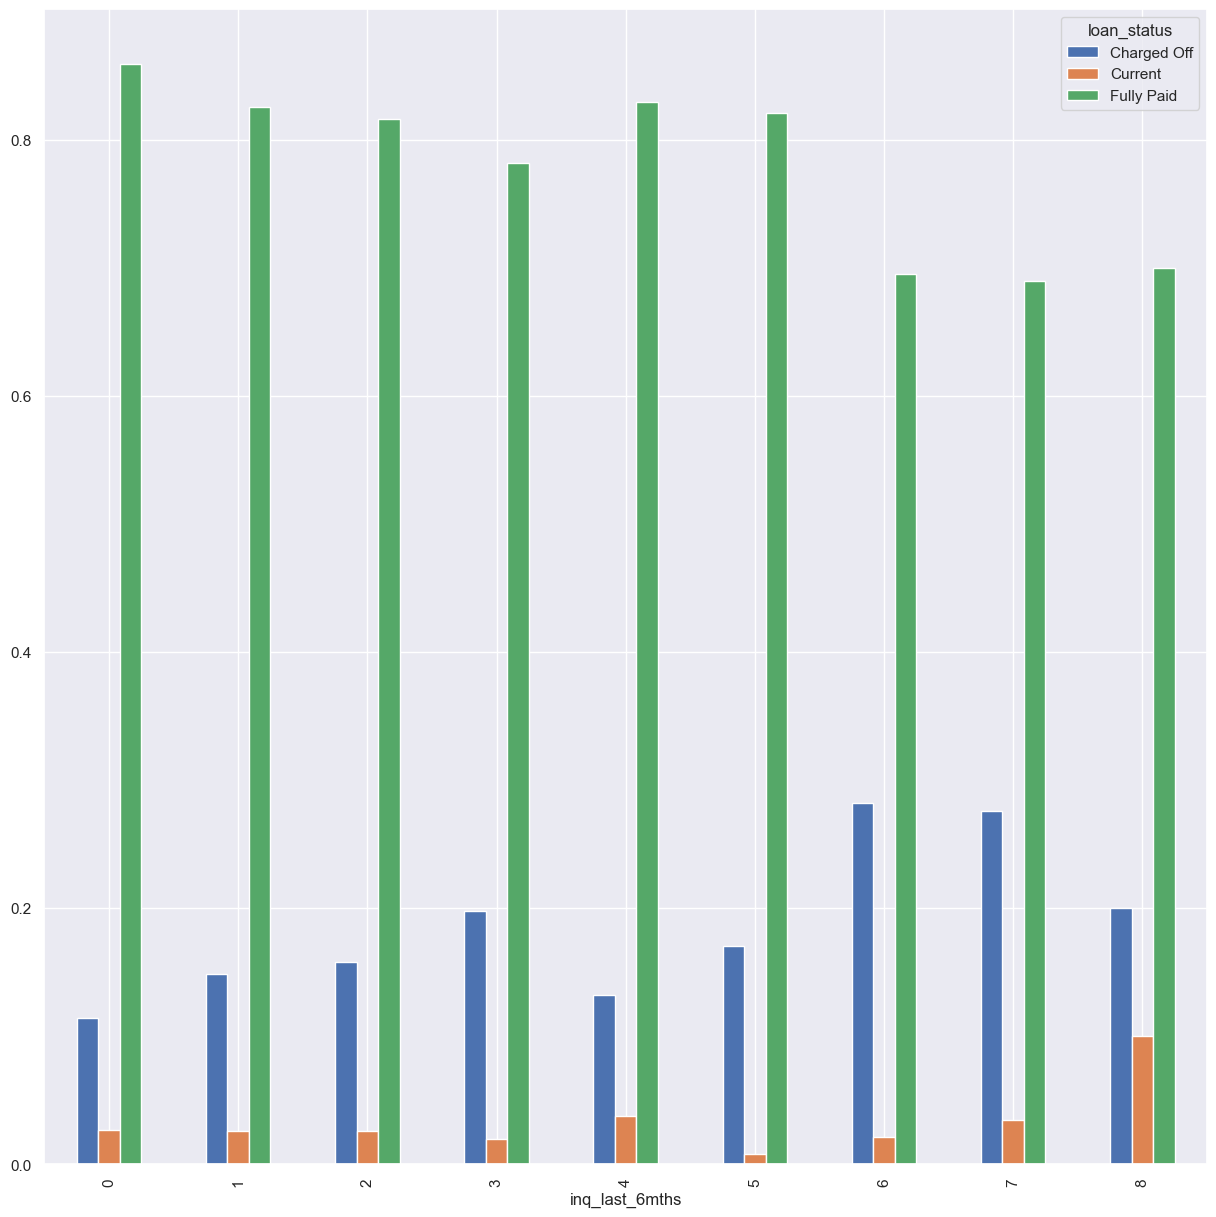

C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)


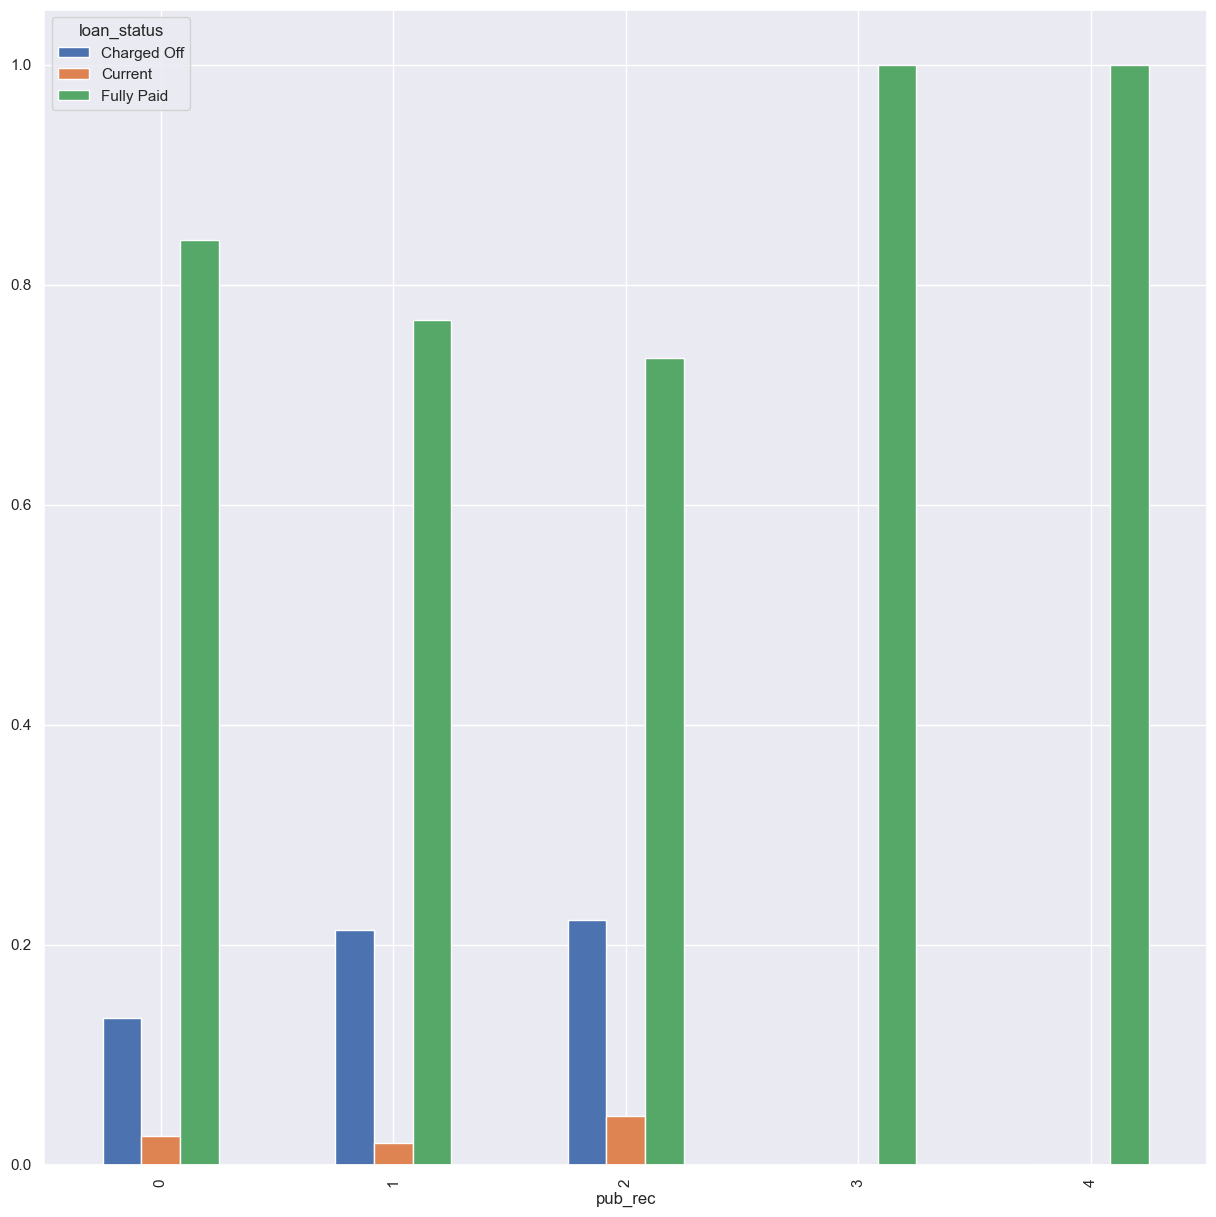

C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3007263211.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)


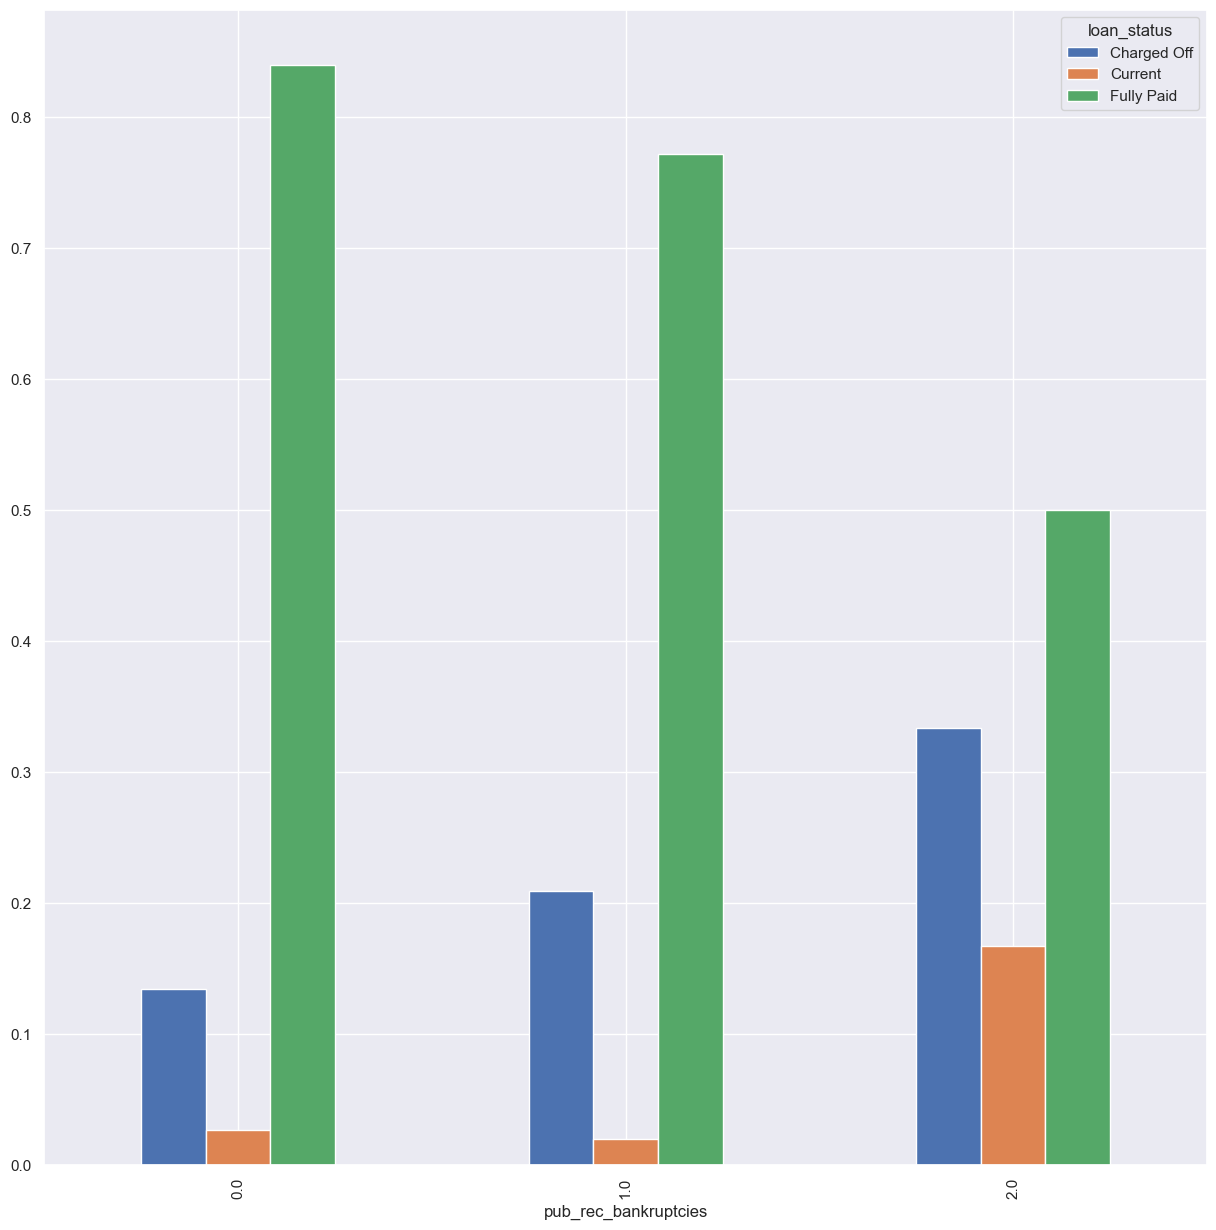

In [91]:
for Columns in other_columns:
    if Columns!='loan_status':
        df1=pd.DataFrame()
        df1[Columns]=df[Columns]
        df1['loan_status']=df['loan_status']
        pivottable=df1.pivot_table(index=Columns,columns='loan_status',aggfunc=lambda x : len(x),margins=True)
        df2=pivottable.drop('All',axis=0).copy()
        df2.loc[:,'Charged Off':'Fully Paid']=df2.loc[:,'Charged Off':'Fully Paid'].div(pivottable['All'],axis=0)
        df2.loc[:,'Charged Off':'Fully Paid'].plot.bar()
        plt.show()